# Soft Computing - Assignment 
This code was use to develop two approximation techniques to solve instances of the Capacitated Single Allocation p-Hub Location Problem (CSApHLP) and the evaluation of their performance. These models were used on two datasets, an application of passenger flights (CAB) and a portal system (TR) with different problem configurations. The two approximation techniques chosen were Reduced V ariable Neighbourhood Search (RVNS), a form of VNS, and Simulated Annealing (SA). The results show that the SA performs worse than the RVNS especially for higher number of nodes. This could be changed in future work through different stopping criteria and through changing the neighbourhood structures differently.

## Attention: The execution time of the whole notebook is very high!

In [1]:
#First: Find initial solution
import random
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite

#Model 1: Generating a random initial solution:
def generate_ran_initial(number_hubs, nodes):
    #step 1: decide on the number of hubs (given)
    #step 1: define a hub array and a solution array
    hubs = []
    solution_array = []
        
    #step 2: randomly generate three hub facility (stablish a hub array)
    randomlist = random.sample(nodes, number_hubs)
    hubs = randomlist
    
    for i in range(0, len(nodes)):
        #step 3: allocate hub nodes to themselves
        if i in hubs:
        #if node is hub, then get hub
            solution_array.append(i)

        #step 4: allocate the rest of the nodes to one of the three hubs
        #node is not a hub, so gets random hub
        else:
            solution_array.append(np.random.choice(hubs, 1)[0])
            #connect current node to matching hub

    return solution_array, hubs

# Calculate Cost 

In [2]:
def get_hub_flow(hub_array, alloc_list):
    hub_flow_list = []
    for hub in hub_array:
        hub_flow=0
        for alloc in range(0,len(alloc_list)):
            if alloc_list[alloc] == hub:
                for i in range(0, len(flow[alloc])):
                #first row, then column
                    hub_flow += flow.iloc[alloc,i]
        
        hub_flow_list.append(hub_flow)
       
    return hub_flow_list

#calculate solution cost
def calculate_sol_cost(alloc_list, flow_array, cost_array, hub_array, alfa, node_list):
    flow_cost = 0
    total_flow_cost = 0
    hub_cost = 0
    hub_flow = get_hub_flow(hub_array, alloc_list)
    just_flow = 0
    just_hub = 0

    for i in range(0, len(node_list)):
        for j in range(0, len(node_list)):
            flow_cost = flow_array.iloc[i,j] * (cost_array.iloc[i,alloc_list[i]] + cost_array.iloc[alloc_list[i],alloc_list[j]] * alfa + cost_array.iloc[alloc_list[j],j])
            total_flow_cost = total_flow_cost + flow_cost
            just_flow += flow_cost
        #calculate hub cost
    for h in range(0,len(hub_array)):
         #small capacity:
        if hub_flow[h] <= small_capacity:
            hub_cost += small_hub_costs
            
        #medium capacity:
        elif hub_flow[h] <= medium_capacity:
            hub_cost += medium_hub_costs
        #large capacity:
        elif hub_flow[h] <= large_capacity:
            hub_cost += large_hub_costs
    just_hub += hub_cost  
        
    total_flow_cost += hub_cost

    return total_flow_cost

#check if model is feasible, so if, flow of each hub is smaller than the large capacity
def check_feasibility(hub_flow):
    for flow in hub_flow:
        if flow > large_capacity:
            return False
        
        return True
    

In [3]:
test_flows = generate_ran_initial(3, list(range(0, 25)))
#print(test_flows[0])
#print(len(test_flows[0]))


In [4]:
test_hub_array = [6, 13, 24]
test_flow = test_flows[0]
test_nodes = list(range(0, 25))
test_alfa = 0.2

#print(calculate_sol_cost(test_flow, flow, cost, test_hub_array, test_alfa, test_nodes))

# Calculate Flow

In [5]:
#Test of method with empty hub:

test_hub_array = [9, 7, 6]
test_flows = [7, 9, 7, 9, 7, 9, 6, 7, 7, 9]

#print(get_hub_flow(test_hub_array, test_flows))

In [6]:
#Tests:
number_of_hubs = 3
nodes = [0,1,2,3,4,5,6,7,8,9]

#Run Model 1:
#ini_sol_array, hubs = generate_ran_initial(number_of_hubs, nodes)

#print("ini_sol_array",ini_sol_array)
#print("Hubs",hubs)
#print("Type", type(hubs))
# check flow (if flow is under large capacity for each hub)
#hub_flows = get_hub_flow(hubs, ini_sol_array)

#print("hub_flows", hub_flows)
#print("Initial Solution feasible?", check_feasibility(hub_flows))

#Optional: Generate Model 2: Random Hubs and proximity-based allocation

In [7]:
def get_initial_solution(number_of_hubs, number_of_nodes):
    sol_found = False
    while not sol_found:
        ini_sol_array, hubs = generate_ran_initial(number_of_hubs, list(range(0, number_of_nodes)))
        if check_feasibility(get_hub_flow(hubs, ini_sol_array)):
            sol_found = True
    return ini_sol_array

# Neighbourhood Structures

In [9]:
#returns without hub!
def get_alloc_nodes_of_hub(hub, nodes_list):
    nodes_of_hub = []
    for node in range(0, len(nodes_list)):
        if nodes_list[node] == hub and node != hub:
            nodes_of_hub.append(node)
    return nodes_of_hub
    

In [10]:
#Test of get_nodes_of_hub(hub, nodes_list)    
#Test of method with empty hub:

test_hub_array = [9, 7, 6]
test_flows = [7, 9, 7, 9, 7, 9, 6, 7, 7, 9]

#assert get_alloc_nodes_of_hub(9, test_flows) == [1,3,5]
#assert get_alloc_nodes_of_hub(7, test_flows) == [0,2,4,8]
print("Test get_nodes_of_hub(hub, nodes_list) passed")

#Check feasibility:
#hub_flow = get_hub_flow(test_hub_array,test_flows)
#check_feasibility(hub_flow)

Test get_nodes_of_hub(hub, nodes_list) passed


In [11]:
#different neighbourhood structure methods
def neighbourhood_node_hub_swap(alloc_list, hub_list, nodes_list):
    #make a list with hubs, that have at least one node (excerpt for themselves)
    possible_hubs = [hub for hub in hub_list if alloc_list.count(hub) >= 2]
   
    #choose random hub
    chosen_hub = np.random.choice(possible_hubs, 1)[0]
  
    #Check feasibility:
    test_alloc_list = alloc_list.copy()
    test_hub_list = hub_list.copy()
    
    
    #choose random node of hub 
    chosen_node = np.random.choice(get_alloc_nodes_of_hub(chosen_hub, alloc_list), 1)[0]
   
    #switch node and hub:
    test_hub_list[test_hub_list.index(chosen_hub)] = chosen_node
    
    #replace hub in list:
    for i in range(0, len(test_alloc_list)):
        if test_alloc_list[i] == chosen_hub:
            test_alloc_list[i] = chosen_node
            
    hub_flows = get_hub_flow(test_hub_list, test_alloc_list)
    if check_feasibility(hub_flows):
        return test_alloc_list, test_hub_list, nodes_list
    else:
        return alloc_list, hub_list, nodes_list  
    

In [12]:
#Test of neighbourhood_node_hub_swap(nodes_list, hub_list)
#Test of method with empty hub:

test_hub_array = [9, 7, 6]
test_allocation = [7, 9, 7, 9, 7, 9, 6, 7, 7, 9]
test_nodes = [0,1,2,3,4,5,6,7,8,9]
#new_allocs, new_hubs, new_nodes = neighbourhood_node_hub_swap(test_allocation, test_hub_array, test_nodes)
#print("New nodes: ",new_allocs)
#print("New hubs: ",new_hubs)

In [13]:
def get_nodes_of_hub(hub, nodes_list, alloc_list):
    nodes_of_hub = []
    for alloc in range(0, len(alloc_list)):
        if alloc_list[alloc] == hub:
            nodes_of_hub.append(alloc)
    return nodes_of_hub

In [14]:
#different neighbourhood structure methods
def neighbourhood_swap_allocation(alloc_list, hub_list, nodes_list):
    #make a list with hubs, that have at least one node (excerpt for themselves)
    possible_hubs = [hub for hub in hub_list if alloc_list.count(hub) >= 2]
    #choose 2 random hubs
    #if 2 hubs have no nodes then don't change
    if len(possible_hubs) < 2:
        return alloc_list, hub_list, nodes_list  
    chosen_hubs = np.random.choice(possible_hubs, 2, replace=False)

    chosen_first_node = np.random.choice(get_alloc_nodes_of_hub(chosen_hubs[0], alloc_list), 1)[0]
    #choose random node of hub 
    chosen_second_node = np.random.choice(get_alloc_nodes_of_hub(chosen_hubs[1], alloc_list), 1)[0]

    #Check feasibility:
    test_alloc_list = alloc_list.copy()
    test_hub_list = hub_list.copy()

    #switch allocations of nodes:
    test_alloc_list[chosen_first_node] = chosen_hubs[1]
    test_alloc_list[chosen_second_node] = chosen_hubs[0]
    
    hub_flows = get_hub_flow(test_hub_list, test_alloc_list)
    if check_feasibility(hub_flows):
        return test_alloc_list, test_hub_list, nodes_list
    else:
        return alloc_list, hub_list, nodes_list  


In [15]:
#Test of neighbourhood_swap_allocation(nodes_list, hub_list)
#Test of method with empty hub:

test_hub_array = [9, 7, 6]
test_allocation = [7, 9, 7, 9, 7, 9, 6, 7, 7, 9]
test_nodes = [0,1,2,3,4,5,6,7,8,9]
#new_allocs, new_hubs, new_nodes = neighbourhood_swap_allocation(test_allocation, test_hub_array, test_nodes)
#print("New nodes: ",new_allocs)
#print("New hubs: ",new_hubs)
   

In [16]:
#different neighbourhood structure methods
def neighbourhood_reallocate_node(alloc_list, hub_list, nodes_list):
    just_nodes = [node for node in nodes_list if node not in hub_list]
    #choose random node
    chosen_node = np.random.choice(just_nodes, 1)[0]
  
    #choose random hub
    possible_hubs = [hub for hub in hub_list if hub != alloc_list[chosen_node]]
    #if no other hub
    if len(possible_hubs) < 2:
        return alloc_list, hub_list, nodes_list  
    chosen_hub = np.random.choice(possible_hubs, 1)[0]
    
       #Check feasibility:
    test_alloc_list = alloc_list.copy()
    test_hub_list = hub_list.copy()

    #replace hub of in list:
    test_alloc_list[chosen_node] = chosen_hub
  
    hub_flows = get_hub_flow(test_hub_list, test_alloc_list)
    if check_feasibility(hub_flows):
        return test_alloc_list, test_hub_list, nodes_list
    else:
        return alloc_list, hub_list, nodes_list  
    
    
    
    



In [17]:
#Test of neighbourhood_reallocate_node

#Test of method with empty hub:
test_hub_array = [9, 7, 6]
test_allocation = [7, 9, 7, 9, 7, 9, 6, 7, 7, 9]
test_nodes = [0,1,2,3,4,5,6,7,8,9]
#new_allocs, new_hubs, new_nodes = neighbourhood_reallocate_node(test_allocation, test_hub_array, test_nodes)
#print("New nodes: ",new_allocs)
#print("New hubs: ",new_hubs)
   
    

In [18]:
#different neighbourhood structure methods
def neighbourhood_swap_nodes(alloc_list, nodes_list, hub_list):
    #make a list with hubs, that have at least two node (excerpt for themselves)
    possible_hubs = [hub for hub in hub_list if alloc_list.count(hub) >= 3]
   
    #choose 2 random hubs
    #if 2 hubs have no nodes then don't change
    if len(possible_hubs) < 2:
        return alloc_list, hub_list, nodes_list   
    chosen_hubs = np.random.choice(possible_hubs, 2, replace=False)
    
    #choose 2 random nodes of first hub
    chosen_first_nodes = np.random.choice(get_alloc_nodes_of_hub(chosen_hubs[0], alloc_list), 2,replace=False )
    
    #choose 2 random nodes of second hub
    chosen_second_nodes = np.random.choice(get_alloc_nodes_of_hub(chosen_hubs[1], alloc_list), 2,replace=False )
    
    #Check feasibility:
    test_alloc_list = alloc_list.copy()
    test_hub_list = hub_list.copy()
    
    #switch allocations of nodes:
    test_alloc_list[chosen_first_nodes[0]] = chosen_hubs[1]
    test_alloc_list[chosen_first_nodes[1]] = chosen_hubs[1]
    test_alloc_list[chosen_second_nodes[0]] = chosen_hubs[0]
    test_alloc_list[chosen_second_nodes[1]] = chosen_hubs[0]
    
    hub_flows = get_hub_flow(test_hub_list, test_alloc_list)
    if check_feasibility(hub_flows):
        return test_alloc_list, test_hub_list, nodes_list
    else:
        return alloc_list, hub_list, nodes_list  


In [19]:
#Test of neighbourhood_swap_nodes
#Test of method with empty hub:
test_hub_array = [9, 7, 6]
test_allocation = [7, 9, 7, 9, 7, 9, 6, 7, 7, 9]
test_nodes = [0,1,2,3,4,5,6,7,8,9]
#new_allocs, new_hubs, new_nodes = neighbourhood_swap_nodes(test_allocation, test_hub_array, test_nodes)
#print("New nodes: ",new_allocs)
#print("New hubs: ",new_hubs)
   

test_hub_array_2 = [0, 1, 9]
test_allocation_2 = [0, 1, 0, 0, 1, 0, 0, 1, 0, 9]
test_nodes_2 = [0,1,2,3,4,5,6,7,8,9]
    
#new_allocs, new_hubs, new_nodes = neighbourhood_swap_nodes(test_allocation_2, test_hub_array_2, test_nodes_2)
#print("New nodes: ",new_allocs)
#print("New hubs: ",new_hubs)   


In [20]:
#different neighbourhood structure methods
def neighbourhood_swap_hubs(alloc_list, hub_list, nodes_list):
    #if no more than 2 hubs, no change
    if len(hub_list) < 2:
        return alloc_list, hub_list, nodes_list 
    #choose 2 random hubs
    chosen_hubs = np.random.choice(hub_list, 2, replace=False)
   
      #Check feasibility:
    test_alloc_list = alloc_list.copy()
    test_hub_list = hub_list.copy()
    
    #switch allocations of all nodes:
    for alloc in range(0, len(test_alloc_list)):
        if test_alloc_list[alloc] == chosen_hubs[0]:
            test_alloc_list[alloc] = chosen_hubs[1]
        elif test_alloc_list[alloc] == chosen_hubs[1]:
            test_alloc_list[alloc] = chosen_hubs[0]

    hub_flows = get_hub_flow(test_hub_list, test_alloc_list)
    if check_feasibility(hub_flows):
        return test_alloc_list, test_hub_list, nodes_list
    else:
        return alloc_list, hub_list, nodes_list  



In [21]:
#Test of neighbourhood_swap_hubs
#Test of method with empty hub:
test_hub_array = [9, 7, 6]
test_allocation = [7, 9, 7, 9, 7, 9, 6, 7, 7, 9]
test_nodes = [0,1,2,3,4,5,6,7,8,9]
#new_allocs, new_hubs, new_nodes = neighbourhood_swap_hubs(test_allocation, test_hub_array, test_nodes)
#print("New nodes: ",new_allocs)
#print("New hubs: ",new_hubs)

In [22]:
#get hubs from allocation list
def get_hubs_from_alloc_list(alloc_list):
    hub_list = []
    for hub in alloc_list:
        if hub not in hub_list:
            hub_list.append(hub)
    return hub_list

In [23]:
#test:
#assert get_hubs_from_alloc_list([7, 9, 7, 9, 7, 9, 6, 7, 7, 9]) == [7,9,6]
#print("Test passed")

In [24]:
#method to choose neighbourhood structure
def get_neighbourhood_structure(number, alloc_list, nodes_list):
    if number == 0:
        return neighbourhood_node_hub_swap(alloc_list, get_hubs_from_alloc_list(alloc_list), nodes_list)
    elif number == 1:
        return neighbourhood_swap_allocation(alloc_list, get_hubs_from_alloc_list(alloc_list), nodes_list)
    elif number == 2:
        return neighbourhood_reallocate_node(alloc_list, get_hubs_from_alloc_list(alloc_list), nodes_list)
    elif number == 3:
        return neighbourhood_swap_nodes(alloc_list, get_hubs_from_alloc_list(alloc_list), nodes_list)
    elif number == 4:
        return neighbourhood_swap_hubs(alloc_list, get_hubs_from_alloc_list(alloc_list), nodes_list)

In [25]:
def rvns(max_iter, initial_solution, alfa, nodes_list, flow, cost):
    iteration = 0
    
    curr_sol = initial_solution
    best_solution = curr_sol
    #print("Initial Solution is: ", initial_solution)
    best_sol_cost = calculate_sol_cost(initial_solution, flow, cost, get_hubs_from_alloc_list(initial_solution), alfa, nodes_list)

    while iteration <= max_iter:
        for k in range(0, 5):
            #randomely generate a new solution from the neighbourhood of solution using k_th neighbourhood structure
            sol_neigh_alloc, sol_neigh_hubs, sol_neigh_nodes = get_neighbourhood_structure(k, curr_sol, nodes_list)
            sol_neigh_cost = calculate_sol_cost(sol_neigh_alloc, flow, cost, get_hubs_from_alloc_list(sol_neigh_alloc), alfa, nodes_list)
            sol_cost = calculate_sol_cost(curr_sol, flow, cost, get_hubs_from_alloc_list(curr_sol), alfa, nodes_list)
            best_sol_cost = calculate_sol_cost(best_solution, flow, cost, get_hubs_from_alloc_list(best_solution), alfa, nodes_list)

            if sol_neigh_cost < sol_cost:
                curr_sol = sol_neigh_alloc
                k += 1
                if sol_neigh_cost < best_sol_cost:
                    best_solution = sol_neigh_alloc
            else:
                k += 1
        iteration += 1
    return best_solution




In [26]:
%%time
max_iter = 500
alfa = 0.2
nodes_list = [0,1,2,3,4,5,6,7,8,9]
initial_solution = [7, 9, 7, 9, 7, 9, 6, 7, 7, 9]
#rvns_solution = rvns(max_iter, initial_solution, 0.2, nodes_list)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs


In [27]:
#print("best solution", rvns_solution)
#print("cost best solution", calculate_sol_cost(rvns_solution, flow, cost, get_hubs_from_alloc_list(rvns_solution), 0.2, nodes_list)
#)

# Second Metaheuristic Model: Simulated Annealing (SA)

In [28]:
#Tests:
test_hub_array = [9, 7, 6]
test_allocation = [5, 5, 5, 3, 3, 5, 6, 6, 5, 6]
test_nodes = [0,1,2,3,4,5,6,7,8,9]
#print("New nodes: ",calculate_sol_cost(test_allocation, flow, cost, get_hubs_from_alloc_list(test_allocation), alfa, test_nodes))
#print("New hubs: ",get_cost(test_allocation))


In [29]:
import math
#temperature change strategy: non-adaptive
def adap_temp_change(curr_temp, r):
    return curr_temp + np.log(1+r)

#Step 1:

#Initialise the iteration number
iter_number = 0

#select min_temp:
min_temp = 10
temp = min_temp
max_temp = 1000

#temperature change:
delta = 10

#Nodes and Alfa:
nodes_list = [0,1,2,3,4,5,6,7,8,9]
#alfa = 0.2


def get_cost(alloc_list, alfa, flow, cost, nodes_list):
    return calculate_sol_cost(alloc_list, flow, cost, get_hubs_from_alloc_list(alloc_list), alfa, nodes_list)


#Step 2:
def simulated_annealing(iter_number, temp, max_temp, curr_solution, nodes_list, alfa, max_iter, min_temp, flow, cost):
    r = 0
    #select initial solution s_ini
    while iter_number < max_iter :
        #randomly select a candidate solution, i_prime (i') from the neighbourhood of the current solution i
        k = np.random.choice(5, 1)[0]
        
        #randomely generate a new solution from the neighbourhood of solution using k_th neighbourhood structure
        cand_solution, sol_neigh_hubs, sol_neigh_nodes = get_neighbourhood_structure(k, curr_solution, nodes_list)
        
        if get_cost(cand_solution, alfa, flow, cost, nodes_list) < get_cost(curr_solution, alfa, flow, cost, nodes_list):
            curr_solution = cand_solution
            #Update i*
            #Update temp_i+1
            r = 0
            temp = min_temp + np.log(1+r)
        elif get_cost(cand_solution, alfa, flow, cost, nodes_list) >= get_cost(curr_solution, alfa, flow, cost, nodes_list):
            #rate of temperature change:
            if get_cost(cand_solution, alfa, flow, cost, nodes_list) - get_cost(curr_solution, alfa, flow, cost, nodes_list) != 0:
                r +=1
            if np.random.choice([0,1],1)[0] < math.exp(-abs(get_cost(cand_solution, alfa, flow, cost, nodes_list)-get_cost(curr_solution, alfa, flow, cost, nodes_list))/temp):
                curr_solution = cand_solution
                #update temp_i+1
            temp = temp + np.log(1+r)
    
        #update iteration number        
        iter_number += 1
    return curr_solution

In [30]:
%%time
#solution = simulated_annealing(0, 10, 1000, [7, 9, 7, 9, 7, 9, 6, 7, 7, 9], [0,1,2,3,4,5,6,7,8,9], 0.2, 1000, 10, flow, cost)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [31]:
#print("solution", solution)
#print("cost best solution", get_cost(solution, 0.2, flow, cost, [0,1,2,3,4,5,6,7,8,9]))

# CAB

## 10 Nodes Data Import

In [32]:
#read data + store it
import pandas as pd

#import data
cost= pd.read_excel('Cost Matrix 10 Nodes.xlsx')
#show df to control
cost

,0,1,2,3,4,5,6,7,8,9
0,0.0000,576.9631,946.4954,597.5972,373.8127,559.7673,709.0215,1208.3280,603.6477,695.2080
1,576.9631,0.0000,369.5327,613.0386,429.1079,312.8831,1196.4890,1502.1400,405.8975,1241.9610
2,946.4954,369.5327,0.0000,858.3308,749.6018,556.0706,1541.2730,1764.7910,621.3306,1603.1650
3,597.5972,613.0386,858.3308,0.0000,255.0303,311.3071,790.1213,907.4331,237.0703,932.2173
4,373.8127,429.1079,749.6018,255.0303,0.0000,225.8954,794.1726,1080.3740,238.9440,879.5647
5,559.7673,312.8831,556.0706,311.3071,225.8954,0.0000,1009.6890,1216.8680,94.2588,1104.5740
6,709.0215,1196.4890,1541.2730,790.1213,794.1726,1009.6890,0.0000,663.8762,982.7378,221.4220
7,1208.3280,1502.1400,1764.7910,907.4331,1080.3740,1216.8680,663.8762,0.0000,1143.7910,874.5181
8,603.6477,405.8975,621.3306,237.0703,238.9440,94.2588,982.7378,1143.7910,0.0000,1094.9060
9,695.2080,1241.9610,1603.1650,932.2173,879.5647,1104.5740,221.4220,874.5181,1094.9060,0.0000


In [33]:
#import data
flow= pd.read_excel('Flow Matrix 10 Nodes.xlsx')
#show df to control
flow

,0,1,2,3,4,5,6,7,8,9
0,0,6469,7629,20036,4690,6194,11688,2243,8857,7248
1,6469,0,12999,13692,3322,5576,3878,3202,6699,4198
2,7629,12999,0,35135,5956,14121,5951,5768,16578,4242
3,20036,13692,35135,0,19094,35119,21423,27342,51341,15826
4,4690,3322,5956,19094,0,7284,3102,1562,7180,1917
5,6194,5576,14121,35119,7284,0,5023,3512,10419,3543
6,11688,3878,5951,21423,3102,5023,0,11557,6479,34261
7,2243,3202,5768,27342,1562,3512,11557,0,5615,7095
8,8857,6699,16578,51341,7180,10419,6479,5615,0,4448
9,7248,4198,4242,15826,1917,3543,34261,7095,4448,0


In [34]:
#capacity
capacities= pd.read_excel('Flow Capacity 10 Nodes.xlsx', header = None)

#499513
small_capacity = capacities.iloc[0][1]
#699318
medium_capacity = capacities.iloc[1][1]
#989036
large_capacity = capacities.iloc[2][1]

# hub fixed costs 
fixed_costs= pd.read_excel('Hub_Fixed_Costs.xlsx', header = None)
#small capacity (50000000):
small_hub_costs = fixed_costs.iloc[1][0]
#medium capacity (100000000):
medium_hub_costs = fixed_costs.iloc[1][1]
#large capacity (150000000):
large_hub_costs =fixed_costs.iloc[1][2]


## 10 Nodes - RVNS CAB

In [63]:
def run_rvns_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost):
    for i in range(0,10):
        # get initial solution
        initial_solution = get_initial_solution(number_of_hubs, number_of_nodes)
        
        # run rvns
        %time 
        rvns_solution = rvns(max_iter, initial_solution, alfa, nodes_list, flow, cost)
        print("Iteration: ", i)
        print("best solution", rvns_solution)
        print("cost best solution", calculate_sol_cost(rvns_solution, flow, cost, get_hubs_from_alloc_list(rvns_solution), alfa, nodes_list))
        hub_flows = get_hub_flow(get_hubs_from_alloc_list(rvns_solution), rvns_solution)
        print("Hub Flows of hub", get_hubs_from_alloc_list(rvns_solution), "are: ", hub_flows )

In [36]:
%%time
number_of_hubs = 3
number_of_nodes = 10
nodes_list = [0,1,2,3,4,5,6,7,8,9]
alfa = 0.2
max_iter = 1000

run_rvns_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

        

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
Iteration:  0
best solution [5, 5, 5, 3, 3, 5, 6, 6, 5, 6]
cost best solution 645192795.5108399
Hub Flows of hub [5, 3, 6] are:  [451875, 293115, 254036]
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.05 µs
Iteration:  1
best solution [0, 8, 8, 8, 8, 8, 6, 6, 8, 6]
cost best solution 735467913.2277203
Hub Flows of hub [0, 8, 6] are:  [75054, 669936, 254036]
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.81 µs
Iteration:  2
best solution [5, 5, 5, 3, 3, 5, 6, 6, 5, 6]
cost best solution 645192795.5108399
Hub Flows of hub [5, 3, 6] are:  [451875, 293115, 254036]
CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 4.05 µs
Iteration:  3
best solution [6, 8, 8, 8, 8, 8, 6, 6, 8, 9]
cost best solution 813240909.4152399
Hub Flows of hub [6, 8, 9] are:  [246312, 669936, 82778]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
Iteration:  4
best solution [4, 4, 2, 3, 4, 4, 4, 

In [37]:
%%time
number_of_hubs = 3
number_of_nodes = 10
nodes_list = [0,1,2,3,4,5,6,7,8,9]
alfa = 0.4
max_iter = 1000

run_rvns_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 3.81 µs
Iteration:  0
best solution [5, 5, 5, 3, 3, 5, 6, 6, 5, 6]
cost best solution 721682063.7132801
Hub Flows of hub [5, 3, 6] are:  [451875, 293115, 254036]
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.05 µs
Iteration:  1
best solution [5, 5, 2, 3, 5, 5, 3, 3, 5, 3]
cost best solution 871210556.2062798
Hub Flows of hub [5, 2, 3] are:  [397603, 108379, 493044]
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.05 µs
Iteration:  2
best solution [5, 5, 5, 3, 3, 5, 6, 6, 5, 6]
cost best solution 721682063.7132801
Hub Flows of hub [5, 3, 6] are:  [451875, 293115, 254036]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
Iteration:  3
best solution [5, 5, 5, 3, 3, 5, 6, 6, 5, 6]
cost best solution 721682063.7132801
Hub Flows of hub [5, 3, 6] are:  [451875, 293115, 254036]
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.05 µs
Iteration:  4
best solution [5, 5, 5

In [38]:
%%time
number_of_hubs = 3
number_of_nodes = 10
nodes_list = [0,1,2,3,4,5,6,7,8,9]
alfa = 0.8
max_iter = 1000

run_rvns_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs
Iteration:  0
best solution [3, 8, 8, 3, 3, 8, 6, 3, 8, 6]
cost best solution 866284453.9206401
Hub Flows of hub [3, 8, 6] are:  [436065, 376821, 186140]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.86 µs
Iteration:  1
best solution [4, 5, 5, 3, 4, 5, 4, 3, 5, 4]
cost best solution 968893571.1412402
Hub Flows of hub [4, 5, 3] are:  [315301, 376821, 306904]
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 2.86 µs
Iteration:  2
best solution [4, 1, 1, 3, 4, 4, 4, 3, 3, 4]
cost best solution 1008995812.5825201
Hub Flows of hub [4, 1, 3] are:  [406092, 168414, 424520]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs
Iteration:  3
best solution [3, 8, 2, 3, 3, 8, 3, 3, 8, 3]
cost best solution 1024348869.7002403
Hub Flows of hub [3, 8, 2] are:  [622205, 268442, 108379]
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.05 µs
Iteration:  4
best solution [8, 1, 1, 3, 8, 8, 3, 3, 8,

### 5 Hubs

In [39]:
%%time
number_of_hubs = 5
number_of_nodes = 10
nodes_list = [0,1,2,3,4,5,6,7,8,9]
alfa = 0.2
max_iter = 1000

run_rvns_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.1 µs
Iteration:  0
best solution [0, 5, 2, 3, 5, 5, 6, 6, 5, 6]
cost best solution 567527288.3112401
Hub Flows of hub [0, 5, 2, 3, 6] are:  [75054, 322549, 108379, 239008, 254036]
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
Iteration:  1
best solution [0, 5, 2, 3, 5, 5, 6, 6, 5, 6]
cost best solution 567527288.3112401
Hub Flows of hub [0, 5, 2, 3, 6] are:  [75054, 322549, 108379, 239008, 254036]
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 3.81 µs
Iteration:  2
best solution [0, 5, 2, 3, 5, 5, 6, 6, 5, 6]
cost best solution 567527288.3112401
Hub Flows of hub [0, 5, 2, 3, 6] are:  [75054, 322549, 108379, 239008, 254036]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs
Iteration:  3
best solution [0, 5, 5, 3, 5, 5, 6, 6, 8, 6]
cost best solution 642574787.3610799
Hub Flows of hub [0, 5, 3, 6, 8] are:  [75054, 313312, 239008, 254036, 117616]
CPU times: user 1 µs, sys: 0 ns, total: 1

In [40]:
%%time
number_of_hubs = 5
number_of_nodes = 10
nodes_list = [0,1,2,3,4,5,6,7,8,9]
alfa = 0.4
max_iter = 1000

run_rvns_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.81 µs
Iteration:  0
best solution [0, 5, 5, 3, 5, 5, 6, 6, 8, 6]
cost best solution 725797087.3923601
Hub Flows of hub [0, 5, 3, 6, 8] are:  [75054, 313312, 239008, 254036, 117616]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs
Iteration:  1
best solution [4, 5, 2, 3, 4, 5, 6, 6, 5, 6]
cost best solution 694773383.3643599
Hub Flows of hub [4, 5, 2, 3, 6] are:  [129161, 268442, 108379, 239008, 254036]
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.81 µs
Iteration:  2
best solution [5, 5, 2, 3, 5, 5, 6, 6, 5, 9]
cost best solution 718771032.79324
Hub Flows of hub [5, 2, 3, 6, 9] are:  [397603, 108379, 239008, 171258, 82778]
CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 3.1 µs
Iteration:  3
best solution [4, 5, 2, 3, 4, 5, 6, 6, 5, 6]
cost best solution 694773383.3643599
Hub Flows of hub [4, 5, 2, 3, 6] are:  [129161, 268442, 108379, 239008, 254036]
CPU times: user 1e+03 ns, sys: 1e

In [41]:
%%time
number_of_hubs = 5
number_of_nodes = 10
nodes_list = [0,1,2,3,4,5,6,7,8,9]
alfa = 0.8
max_iter = 1000

run_rvns_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
Iteration:  0
best solution [3, 1, 1, 3, 3, 8, 6, 3, 8, 6]
cost best solution 895955587.3333602
Hub Flows of hub [3, 1, 8, 6] are:  [436065, 168414, 208407, 186140]
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.05 µs
Iteration:  1
best solution [3, 5, 2, 3, 3, 5, 6, 3, 8, 6]
cost best solution 919861180.42328
Hub Flows of hub [3, 5, 2, 6, 8] are:  [436065, 150826, 108379, 186140, 117616]
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.96 µs
Iteration:  2
best solution [4, 1, 1, 3, 4, 8, 6, 3, 8, 6]
cost best solution 895649915.57804
Hub Flows of hub [4, 1, 3, 8, 6] are:  [129161, 168414, 306904, 208407, 186140]
CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 3.1 µs
Iteration:  3
best solution [4, 8, 2, 3, 4, 8, 6, 3, 8, 6]
cost best solution 892558199.0926
Hub Flows of hub [4, 8, 2, 3, 6] are:  [129161, 268442, 108379, 306904, 186140]
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µ

## 10 Nodes - SA CAB

In [57]:
def run_SA_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost):
    for i in range(0,10):
        # get initial solution
        initial_solution = get_initial_solution(number_of_hubs, number_of_nodes)
        #initial_solution = [7, 9, 7, 9, 7, 9, 6, 7, 7, 9]
        iter_number = 0
        min_temp = 10
        temp = min_temp
        max_temp = 1000 
        # run SA
        %time 
        sa_solution = simulated_annealing(iter_number, temp, max_temp, initial_solution, nodes_list, alfa, max_iter, min_temp, flow, cost)
        print("Iteration: ", i)
        print("best solution", sa_solution)
        print("cost best solution", calculate_sol_cost(sa_solution, flow, cost, get_hubs_from_alloc_list(sa_solution), alfa, nodes_list))
        hub_flows = get_hub_flow(get_hubs_from_alloc_list(sa_solution), sa_solution)
        print("Hub Flows of hub", get_hubs_from_alloc_list(sa_solution), "are: ", hub_flows )


In [43]:
%%time
number_of_hubs = 3
number_of_nodes = 10
nodes_list = [0,1,2,3,4,5,6,7,8,9]
alfa = 0.2
max_iter = 1000

run_SA_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

        

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 4.05 µs
Iteration:  0
best solution [3, 2, 2, 3, 3, 3, 6, 6, 3, 6]
cost best solution 695342651.1273599
Hub Flows of hub [3, 2, 6] are:  [576576, 168414, 254036]
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.81 µs
Iteration:  1
best solution [6, 8, 8, 8, 8, 8, 6, 6, 8, 9]
cost best solution 813240909.4152399
Hub Flows of hub [6, 8, 9] are:  [246312, 669936, 82778]
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 3.1 µs
Iteration:  2
best solution [5, 5, 5, 3, 3, 5, 6, 6, 5, 6]
cost best solution 645192795.5108399
Hub Flows of hub [5, 3, 6] are:  [451875, 293115, 254036]
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs
Iteration:  3
best solution [3, 2, 2, 3, 3, 3, 6, 6, 3, 6]
cost best solution 695342651.1273599
Hub Flows of hub [3, 2, 6] are:  [576576, 168414, 254036]
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 2.86 µs
Iteration:  4
best solution [3, 2, 2, 3, 3, 3, 6, 6

In [44]:
%%time
number_of_hubs = 3
number_of_nodes = 10
nodes_list = [0,1,2,3,4,5,6,7,8,9]
alfa = 0.4
max_iter = 1000

run_SA_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

        

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.86 µs
Iteration:  0
best solution [3, 2, 2, 3, 3, 3, 6, 6, 3, 6]
cost best solution 789912437.35972
Hub Flows of hub [3, 2, 6] are:  [576576, 168414, 254036]
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs
Iteration:  1
best solution [3, 2, 2, 3, 3, 3, 6, 6, 3, 6]
cost best solution 789912437.35972
Hub Flows of hub [3, 2, 6] are:  [576576, 168414, 254036]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs
Iteration:  2
best solution [5, 5, 5, 3, 5, 5, 3, 3, 8, 3]
cost best solution 921446014.1202797
Hub Flows of hub [5, 3, 8] are:  [388366, 493044, 117616]
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs
Iteration:  3
best solution [3, 5, 5, 3, 5, 5, 6, 6, 5, 6]
cost best solution 722755619.8074001
Hub Flows of hub [3, 5, 6] are:  [314062, 430928, 254036]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs
Iteration:  4
best solution [8, 8, 2, 8, 8, 8, 6, 6, 8, 6]
cost best 

In [45]:
%%time
number_of_hubs = 3
number_of_nodes = 10
nodes_list = [0,1,2,3,4,5,6,7,8,9]
alfa = 0.8
max_iter = 1000

run_SA_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.86 µs
Iteration:  0
best solution [3, 8, 8, 3, 3, 8, 6, 3, 8, 6]
cost best solution 866284453.9206401
Hub Flows of hub [3, 8, 6] are:  [436065, 376821, 186140]
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.1 µs
Iteration:  1
best solution [3, 8, 8, 3, 8, 8, 6, 3, 8, 6]
cost best solution 866698895.8119601
Hub Flows of hub [3, 8, 6] are:  [381958, 430928, 186140]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
Iteration:  2
best solution [3, 1, 1, 3, 3, 3, 6, 3, 3, 6]
cost best solution 951916635.79564
Hub Flows of hub [3, 1, 6] are:  [644472, 168414, 186140]
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.86 µs
Iteration:  3
best solution [3, 8, 8, 3, 8, 8, 6, 3, 8, 6]
cost best solution 866698895.8119601
Hub Flows of hub [3, 8, 6] are:  [381958, 430928, 186140]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs
Iteration:  4
best solution [3, 8, 8, 3, 3, 8, 6, 3, 8, 6]
c

In [46]:
%%time
number_of_hubs = 5
number_of_nodes = 10
nodes_list = [0,1,2,3,4,5,6,7,8,9]
alfa = 0.2
max_iter = 1000

run_SA_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs
Iteration:  0
best solution [5, 5, 2, 3, 5, 5, 6, 6, 5, 9]
cost best solution 613565632.14312
Hub Flows of hub [5, 2, 3, 6, 9] are:  [397603, 108379, 239008, 171258, 82778]
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.1 µs
Iteration:  1
best solution [0, 5, 2, 3, 5, 5, 6, 6, 5, 6]
cost best solution 567527288.3112401
Hub Flows of hub [0, 5, 2, 3, 6] are:  [75054, 322549, 108379, 239008, 254036]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
Iteration:  2
best solution [0, 5, 5, 3, 3, 5, 6, 7, 5, 6]
cost best solution 586086285.1120002
Hub Flows of hub [0, 5, 3, 6, 7] are:  [75054, 376821, 293115, 186140, 67896]
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs
Iteration:  3
best solution [0, 5, 2, 3, 5, 5, 6, 6, 5, 6]
cost best solution 567527288.3112401
Hub Flows of hub [0, 5, 2, 3, 6] are:  [75054, 322549, 108379, 239008, 254036]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs

In [47]:
%%time
number_of_hubs = 5
number_of_nodes = 10
nodes_list = [0,1,2,3,4,5,6,7,8,9]
alfa = 0.4
max_iter = 1000

run_SA_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.81 µs
Iteration:  0
best solution [4, 5, 2, 3, 4, 5, 6, 6, 5, 6]
cost best solution 694773383.3643599
Hub Flows of hub [4, 5, 2, 3, 6] are:  [129161, 268442, 108379, 239008, 254036]
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs
Iteration:  1
best solution [5, 5, 2, 3, 5, 5, 6, 6, 5, 9]
cost best solution 718771032.79324
Hub Flows of hub [5, 2, 3, 6, 9] are:  [397603, 108379, 239008, 171258, 82778]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.86 µs
Iteration:  2
best solution [5, 5, 2, 3, 5, 5, 6, 6, 5, 9]
cost best solution 718771032.79324
Hub Flows of hub [5, 2, 3, 6, 9] are:  [397603, 108379, 239008, 171258, 82778]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.86 µs
Iteration:  3
best solution [5, 5, 2, 3, 5, 5, 6, 6, 5, 9]
cost best solution 718771032.79324
Hub Flows of hub [5, 2, 3, 6, 9] are:  [397603, 108379, 239008, 171258, 82778]
CPU times: user 1 µs, sys: 1 µs, total: 2

In [48]:
%%time
number_of_hubs = 5
number_of_nodes = 10
nodes_list = [0,1,2,3,4,5,6,7,8,9]
alfa = 0.8
max_iter = 1000

run_SA_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
Iteration:  0
best solution [4, 1, 1, 3, 4, 8, 6, 3, 8, 6]
cost best solution 895649915.57804
Hub Flows of hub [4, 1, 3, 8, 6] are:  [129161, 168414, 306904, 208407, 186140]
CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 2.86 µs
Iteration:  1
best solution [0, 5, 5, 3, 8, 5, 6, 3, 8, 6]
cost best solution 892023374.42972
Hub Flows of hub [0, 5, 3, 8, 6] are:  [75054, 259205, 306904, 171723, 186140]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs
Iteration:  2
best solution [3, 8, 2, 3, 3, 8, 6, 7, 8, 6]
cost best solution 882802821.1399201
Hub Flows of hub [3, 8, 2, 6, 7] are:  [368169, 268442, 108379, 186140, 67896]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs
Iteration:  3
best solution [0, 5, 5, 3, 8, 5, 6, 3, 8, 6]
cost best solution 892023374.42972
Hub Flows of hub [0, 5, 3, 8, 6] are:  [75054, 259205, 306904, 171723, 186140]
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
W

## 25 Nodes Data Import

In [64]:
#import data
flow= pd.read_excel('Flow Matrix 25 Nodes.xlsx')
#show df to control
flow

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0,6469,7629,20036,4690,6194,11688,2243,8857,7248,...,9986,46618,11639,1380,5261,5985,6731,2704,12250,16132
1,6469,0,12999,13692,3322,5576,3878,3202,6699,4198,...,5105,24817,6532,806,8184,3896,7333,3719,2015,565
2,7629,12999,0,35135,5956,14121,5951,5768,16578,4242,...,3541,205088,37669,2885,13200,7116,17165,4284,8085,51895
3,20036,13692,35135,0,19094,35119,21423,27342,51341,15826,...,14354,172895,37305,15418,26221,42303,35303,13618,17580,40708
4,4690,3322,5956,19094,0,7284,3102,1562,7180,1917,...,1340,25303,6031,1041,4128,5452,3344,1067,4608,7050
5,6194,5576,14121,35119,7284,0,5023,3512,10419,3543,...,2016,62034,15385,2957,5035,7482,6758,2191,6599,14181
6,11688,3878,5951,21423,3102,5023,0,11557,6479,34261,...,13511,29801,7549,5550,3089,9958,14110,4911,2722,10802
7,2243,3202,5768,27342,1562,3512,11557,0,5615,7095,...,2509,23273,5160,8750,2583,7288,17481,7930,1278,8447
8,8857,6699,16578,51341,7180,10419,6479,5615,0,4448,...,4224,79945,20001,4291,10604,11925,13091,4172,12891,19500
9,7248,4198,4242,15826,1917,3543,34261,7095,4448,0,...,20013,28080,5971,2131,3579,6809,8455,2868,2336,5616


In [65]:
#read data + store it
import pandas as pd

#import data
cost= pd.read_excel('Cost Matrix 25 Nodes.xlsx')
#show df to control
cost

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0000,576.9631,946.4954,597.5972,373.8127,559.7673,709.0215,1208.3280,603.6477,695.2080,...,426.1877,756.1987,672.5906,1590.2240,527.3008,483.4673,2140.9780,2184.4020,408.1648,540.7388
1,576.9631,0.0000,369.5327,613.0386,429.1079,312.8831,1196.4890,1502.1400,405.8975,1241.9610,...,999.5005,179.2426,96.2744,1999.5840,210.7656,736.3755,2456.2630,2339.5090,844.1663,36.4947
2,946.4954,369.5327,0.0000,858.3308,749.6018,556.0706,1541.2730,1764.7910,621.3306,1603.1650,...,1368.2670,190.3157,274.3105,2299.4290,494.2224,1043.4840,2703.4020,2503.8280,1188.5490,405.7886
3,597.5972,613.0386,858.3308,0.0000,255.0303,311.3071,790.1213,907.4331,237.0703,932.2173,...,830.3635,720.4687,675.3437,1447.1040,403.8657,255.8823,1853.6170,1733.1320,1005.7610,592.0278
4,373.8127,429.1079,749.6018,255.0303,0.0000,225.8954,794.1726,1080.3740,238.9440,879.5647,...,700.4368,578.3286,512.3965,1570.7250,255.6551,307.3289,2036.1280,1967.2560,775.2390,399.2253
5,559.7673,312.8831,556.0706,311.3071,225.8954,0.0000,1009.6890,1216.8680,94.2588,1104.5740,...,922.3181,409.3542,365.6853,1743.4320,104.6478,491.1125,2164.8550,2027.3190,933.1960,298.8486
6,709.0215,1196.4890,1541.2730,790.1213,794.1726,1009.6890,0.0000,663.8762,982.7378,221.4220,...,423.7053,1362.8740,1288.9660,895.0908,1049.2660,537.6206,1493.8430,1686.6750,912.2104,1161.6760
7,1208.3280,1502.1400,1764.7910,907.4331,1080.3740,1216.8680,663.8762,0.0000,1143.7910,874.5181,...,1066.5630,1625.8700,1574.8220,593.4216,1301.5110,780.9512,955.8020,1024.5660,1519.1740,1475.4790
8,603.6477,405.8975,621.3306,237.0703,238.9440,94.2588,982.7378,1143.7910,0.0000,1094.9060,...,936.2502,489.5645,453.2583,1682.4890,198.9058,450.2585,2086.8450,1936.3040,992.3379,392.9045
9,695.2080,1241.9610,1603.1650,932.2173,879.5647,1104.5740,221.4220,874.5181,1094.9060,0.0000,...,305.3132,1417.0720,1337.6480,1017.3320,1125.0410,677.0608,1649.6190,1891.1660,795.2136,1205.7470


In [66]:
#capacity
capacities= pd.read_excel('Flow Capacity 25 Nodes.xlsx', header = None)

#4270003
small_capacity = capacities.iloc[0][1]
#5978004.2
medium_capacity = capacities.iloc[1][1]
#8454605.94
large_capacity = capacities.iloc[2][1]

# hub fixed costs 
fixed_costs= pd.read_excel('Hub_Fixed_Costs.xlsx', header = None)
#small capacity (50000000):
small_hub_costs = fixed_costs.iloc[1][0]
#medium capacity (100000000):
medium_hub_costs = fixed_costs.iloc[1][1]
#large capacity (150000000):
large_hub_costs =fixed_costs.iloc[1][2]


## 25 Nodes - RVNS CAB

In [52]:
%%time
number_of_hubs = 3
number_of_nodes = 25
nodes_list = list(range(0, 25))
alfa = 0.2
max_iter = 1000

run_rvns_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.1 µs
Iteration:  0
best solution [3, 16, 16, 3, 3, 3, 3, 3, 3, 3, 3, 11, 3, 16, 3, 3, 16, 16, 11, 16, 3, 11, 11, 3, 16]
cost best solution 6703168422.389513
Hub Flows of hub [3, 16, 11] are:  [3575410, 3617487, 1347109]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
Iteration:  1
best solution [3, 16, 16, 3, 3, 3, 3, 3, 3, 3, 3, 11, 3, 16, 3, 3, 16, 16, 11, 16, 3, 11, 11, 3, 16]
cost best solution 6703168422.389513
Hub Flows of hub [3, 16, 11] are:  [3575410, 3617487, 1347109]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
Iteration:  2
best solution [4, 16, 16, 4, 4, 4, 4, 11, 4, 4, 4, 11, 4, 4, 4, 4, 16, 16, 11, 4, 4, 11, 11, 4, 16]
cost best solution 6769330773.544997
Hub Flows of hub [4, 16, 11] are:  [4083240, 2901830, 1554936]
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs
Iteration:  3
best solution [20, 16, 16, 20, 20, 16, 20, 20, 20, 20, 20, 11, 20, 20, 20, 20, 16, 16, 

In [53]:
#print("Flow2b: ", alloc_list[j])

In [54]:
%%time
number_of_hubs = 3
number_of_nodes = 25
nodes_list = list(range(0, 25))
alfa = 0.4
max_iter = 1000

run_rvns_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.05 µs
Iteration:  0
best solution [3, 16, 16, 3, 3, 3, 3, 3, 3, 3, 3, 11, 3, 16, 3, 3, 16, 16, 11, 16, 3, 11, 11, 3, 16]
cost best solution 7865836375.755045
Hub Flows of hub [3, 16, 11] are:  [3575410, 3617487, 1347109]
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.1 µs
Iteration:  1
best solution [20, 16, 16, 20, 5, 5, 20, 20, 5, 20, 20, 20, 20, 5, 20, 20, 16, 16, 20, 5, 20, 20, 20, 20, 16]
cost best solution 9842830519.589645
Hub Flows of hub [20, 16, 5] are:  [4169396, 2901830, 1468780]
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs
Iteration:  2
best solution [3, 17, 17, 3, 3, 3, 3, 3, 3, 3, 3, 11, 3, 17, 3, 3, 17, 17, 11, 17, 3, 11, 11, 17, 17]
cost best solution 7850513536.113514
Hub Flows of hub [3, 17, 11] are:  [3416505, 3776392, 1347109]
CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 2.86 µs
Iteration:  3
best solution [3, 16, 16, 3, 3, 3, 3, 3, 3, 3, 3, 11, 3, 16, 3, 3, 1

In [55]:
%%time
number_of_hubs = 3
number_of_nodes = 25
nodes_list = list(range(0, 25))
alfa = 0.8
max_iter = 1000

run_rvns_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.29 µs
Iteration:  0
best solution [1, 1, 1, 3, 3, 3, 3, 7, 3, 3, 3, 7, 3, 1, 3, 3, 1, 1, 7, 1, 3, 7, 7, 1, 1]
cost best solution 10219993098.817831
Hub Flows of hub [1, 3, 7] are:  [4019265, 2965805, 1554936]
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.1 µs
Iteration:  1
best solution [0, 17, 17, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 3, 0, 17, 17, 3, 17, 3, 3, 3, 0, 17]
cost best solution 10940926605.764084
Hub Flows of hub [0, 17, 3] are:  [1336189, 3144777, 4059040]
CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 3.1 µs
Iteration:  2
best solution [1, 1, 1, 3, 3, 3, 3, 7, 3, 3, 3, 7, 3, 1, 3, 3, 1, 1, 7, 1, 3, 7, 7, 1, 1]
cost best solution 10219993098.817831
Hub Flows of hub [1, 3, 7] are:  [4019265, 2965805, 1554936]
CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 2.62 µs
Iteration:  3
best solution [1, 1, 1, 3, 3, 3, 3, 7, 3, 3, 3, 7, 3, 1, 3, 3, 1, 1, 7, 1, 3, 7, 7, 1, 1]
cost best solution 102

In [56]:
%%time
number_of_hubs = 5
number_of_nodes = 25
nodes_list = list(range(0, 25))
alfa = 0.2
max_iter = 1000

run_rvns_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.05 µs
Iteration:  0
best solution [4, 24, 16, 3, 4, 4, 4, 3, 4, 4, 3, 11, 4, 24, 3, 4, 16, 16, 11, 24, 3, 11, 11, 4, 24]
cost best solution 5972575499.803037
Hub Flows of hub [4, 24, 16, 3, 11] are:  [1879019, 1347290, 2270197, 1696391, 1347109]
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.1 µs
Iteration:  1
best solution [20, 16, 16, 20, 19, 19, 20, 20, 19, 20, 20, 11, 20, 13, 20, 20, 16, 16, 11, 19, 20, 11, 11, 13, 19]
cost best solution 5238935595.213283
Hub Flows of hub [20, 16, 19, 11, 13] are:  [2663382, 2413424, 1484476, 1347109, 631615]
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 2.86 µs
Iteration:  2
best solution [24, 24, 16, 3, 3, 24, 6, 6, 3, 6, 3, 11, 6, 24, 3, 6, 16, 16, 11, 24, 3, 11, 11, 24, 24]
cost best solution 5400373632.6465225
Hub Flows of hub [24, 16, 3, 6, 11] are:  [2004360, 2270197, 1986395, 931945, 1347109]
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs
Ite

In [57]:
%%time
number_of_hubs = 5
number_of_nodes = 25
nodes_list = list(range(0, 25))
alfa = 0.4
max_iter = 1000

run_rvns_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
Iteration:  0
best solution [23, 16, 16, 3, 3, 3, 6, 6, 3, 6, 3, 11, 3, 23, 3, 6, 16, 16, 11, 16, 3, 11, 11, 23, 16]
cost best solution 6316857940.272527
Hub Flows of hub [23, 16, 3, 6, 11] are:  [874488, 3144777, 2340014, 833618, 1347109]
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs
Iteration:  1
best solution [0, 17, 2, 10, 0, 17, 10, 10, 17, 10, 10, 10, 0, 0, 10, 0, 17, 17, 10, 17, 10, 10, 10, 0, 17]
cost best solution 9421526555.431124
Hub Flows of hub [0, 17, 2, 10] are:  [1263303, 3248280, 516949, 3511474]
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 2.86 µs
Iteration:  2
best solution [23, 16, 16, 8, 8, 8, 10, 10, 8, 10, 10, 11, 10, 23, 10, 23, 16, 16, 11, 8, 10, 11, 11, 23, 16]
cost best solution 6609704332.028005
Hub Flows of hub [23, 16, 8, 10, 11] are:  [1032305, 2901830, 1853309, 1405453, 1347109]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs
Iteration:  3
b

In [58]:
%%time
number_of_hubs = 5
number_of_nodes = 25
nodes_list = list(range(0, 25))
alfa = 0.8
max_iter = 1000

run_rvns_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 2.86 µs
Iteration:  0
best solution [0, 17, 17, 3, 3, 3, 6, 6, 3, 6, 3, 11, 0, 0, 3, 0, 17, 17, 11, 17, 3, 11, 11, 0, 17]
cost best solution 9081244505.862726
Hub Flows of hub [0, 17, 3, 6, 11] are:  [1130632, 3144777, 2241687, 675801, 1347109]
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 2.86 µs
Iteration:  1
best solution [19, 19, 2, 3, 19, 19, 3, 3, 19, 3, 3, 11, 3, 19, 3, 3, 16, 16, 11, 19, 3, 11, 11, 19, 19]
cost best solution 9696456841.726467
Hub Flows of hub [19, 2, 3, 11, 16] are:  [2502191, 516949, 2420509, 1347109, 1753248]
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 2.86 µs
Iteration:  2
best solution [0, 19, 16, 3, 19, 19, 0, 3, 8, 0, 3, 3, 0, 0, 3, 0, 16, 16, 3, 19, 3, 3, 3, 0, 19]
cost best solution 10571768915.258726
Hub Flows of hub [0, 19, 16, 3, 8] are:  [1598606, 1262543, 2270197, 3043500, 365160]
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.81 µs
Iteration:  3
best solut

## 25 Nodes - SA CAB

In [59]:
%%time
number_of_hubs = 3
number_of_nodes = 25
nodes_list = list(range(0, 25))
alfa = 0.2
max_iter = 1000

run_SA_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs
Iteration:  0
best solution [3, 16, 16, 3, 3, 3, 3, 11, 3, 3, 3, 11, 3, 16, 3, 3, 16, 16, 11, 16, 3, 11, 11, 16, 16]
cost best solution 6732667898.40072
Hub Flows of hub [3, 16, 11] are:  [3208678, 3776392, 1554936]
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.1 µs
Iteration:  1
best solution [23, 16, 16, 10, 10, 16, 10, 10, 16, 10, 10, 10, 10, 23, 10, 23, 16, 16, 10, 16, 10, 10, 10, 23, 16]
cost best solution 8566213357.431991
Hub Flows of hub [23, 16, 10] are:  [1032305, 3765229, 3742472]
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs
Iteration:  2
best solution [3, 16, 16, 3, 3, 3, 3, 11, 3, 3, 3, 11, 3, 16, 3, 3, 16, 16, 11, 16, 3, 11, 11, 3, 16]
cost best solution 6730518687.167715
Hub Flows of hub [3, 16, 11] are:  [3367583, 3617487, 1554936]
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.81 µs
Iteration:  3
best solution [3, 16, 16, 3, 3, 3, 3, 11, 3, 3, 3, 11, 11, 16, 3, 3, 

In [60]:
%%time
number_of_hubs = 3
number_of_nodes = 25
nodes_list = list(range(0, 25))
alfa = 0.4
max_iter = 1000

run_SA_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
Iteration:  0
best solution [3, 16, 16, 3, 3, 3, 10, 10, 3, 10, 10, 10, 10, 16, 3, 10, 16, 16, 10, 16, 10, 10, 10, 3, 16]
cost best solution 9373725896.141245
Hub Flows of hub [3, 16, 10] are:  [2225656, 3617487, 2696863]
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.81 µs
Iteration:  1
best solution [3, 17, 17, 3, 3, 3, 3, 3, 3, 3, 3, 11, 3, 17, 3, 3, 17, 17, 11, 17, 3, 11, 11, 17, 17]
cost best solution 7850513536.113514
Hub Flows of hub [3, 17, 11] are:  [3416505, 3776392, 1347109]
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 3.1 µs
Iteration:  2
best solution [3, 16, 16, 3, 3, 3, 3, 3, 3, 3, 3, 11, 3, 16, 3, 3, 16, 16, 11, 16, 3, 11, 11, 3, 16]
cost best solution 7865836375.755045
Hub Flows of hub [3, 16, 11] are:  [3575410, 3617487, 1347109]
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 2.86 µs
Iteration:  3
best solution [3, 17, 17, 3, 3, 3, 3, 11, 3, 3, 3, 11, 3, 17, 3, 3, 17, 17

In [61]:
%%time
number_of_hubs = 3
number_of_nodes = 25
nodes_list = list(range(0, 25))
alfa = 0.8
max_iter = 1000

run_SA_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
Iteration:  0
best solution [4, 17, 17, 4, 4, 4, 10, 10, 4, 10, 10, 10, 4, 4, 10, 4, 17, 17, 10, 17, 4, 10, 10, 4, 17]
cost best solution 10776927438.5948
Hub Flows of hub [4, 17, 10] are:  [2988839, 3144777, 2406390]
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.81 µs
Iteration:  1
best solution [19, 19, 16, 20, 19, 19, 20, 20, 19, 20, 20, 20, 20, 19, 20, 20, 16, 16, 20, 19, 20, 20, 20, 19, 19]
cost best solution 10990336487.85162
Hub Flows of hub [19, 16, 20] are:  [2502191, 2270197, 3767618]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
Iteration:  2
best solution [1, 1, 1, 3, 3, 3, 3, 7, 3, 7, 3, 7, 3, 1, 3, 3, 1, 1, 7, 1, 3, 7, 7, 1, 1]
cost best solution 10382859946.669186
Hub Flows of hub [1, 3, 7] are:  [4019265, 2760248, 1760493]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.86 µs
Iteration:  3
best solution [4, 17, 17, 4, 4, 4, 10, 10, 4, 10, 10, 10, 4, 4, 10, 4, 17, 17, 

In [62]:
%%time
number_of_hubs = 5
number_of_nodes = 25
nodes_list = list(range(0, 25))
alfa = 0.2
max_iter = 1000

run_SA_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.81 µs
Iteration:  0
best solution [0, 16, 16, 3, 5, 5, 0, 3, 5, 0, 5, 11, 0, 0, 3, 0, 16, 16, 11, 5, 3, 11, 11, 0, 16]
cost best solution 5397479474.901242
Hub Flows of hub [0, 16, 3, 5, 11] are:  [1598606, 2901830, 1526427, 1166034, 1347109]
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 3.81 µs
Iteration:  1
best solution [20, 16, 16, 20, 19, 19, 20, 20, 19, 20, 20, 11, 20, 19, 20, 20, 16, 16, 11, 19, 20, 11, 11, 19, 19]
cost best solution 6195452785.885363
Hub Flows of hub [20, 16, 19, 11] are:  [2663382, 2413424, 2116091, 1347109]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
Iteration:  2
best solution [19, 16, 16, 3, 19, 19, 3, 3, 19, 23, 3, 11, 3, 23, 3, 23, 16, 16, 11, 19, 3, 11, 11, 23, 19]
cost best solution 5334986480.747841
Hub Flows of hub [19, 16, 3, 23, 11] are:  [1727349, 2413424, 2057135, 994989, 1347109]
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.05 µs
Iteration:  3

In [63]:
%%time
number_of_hubs = 5
number_of_nodes = 25
nodes_list = list(range(0, 25))
alfa = 0.4
max_iter = 1000

run_SA_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.81 µs
Iteration:  0
best solution [24, 24, 16, 3, 24, 24, 3, 3, 3, 3, 3, 11, 24, 24, 3, 3, 16, 16, 11, 24, 3, 11, 11, 24, 24]
cost best solution 7458405591.928078
Hub Flows of hub [24, 16, 3, 11] are:  [2235358, 2270197, 2687342, 1347109]
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.05 µs
Iteration:  1
best solution [20, 17, 2, 3, 3, 3, 20, 20, 3, 20, 20, 11, 20, 17, 20, 20, 17, 17, 11, 17, 20, 11, 11, 20, 17]
cost best solution 7259724045.50552
Hub Flows of hub [20, 17, 2, 3, 11] are:  [1965048, 3100538, 516949, 1610362, 1347109]
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.77 µs
Iteration:  2
best solution [0, 19, 16, 3, 19, 19, 0, 11, 19, 0, 3, 11, 0, 0, 3, 0, 16, 16, 11, 19, 3, 11, 11, 0, 19]
cost best solution 6709143252.2365055
Hub Flows of hub [0, 19, 16, 3, 11] are:  [1598606, 1627703, 2270197, 1488564, 1554936]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs
Iteration:  3
best s

In [67]:
%%time
number_of_hubs = 5
number_of_nodes = 25
nodes_list = list(range(0, 25))
alfa = 0.8
max_iter = 1000

run_SA_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs
Iteration:  0
best solution [0, 16, 16, 8, 8, 8, 20, 7, 8, 20, 20, 7, 8, 0, 20, 0, 16, 16, 7, 8, 20, 7, 7, 0, 16]
cost best solution 9552756721.15405
Hub Flows of hub [0, 16, 8, 20, 7] are:  [1032305, 2901830, 1951636, 1099299, 1554936]
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs
Iteration:  1
best solution [5, 17, 17, 3, 5, 5, 3, 7, 5, 3, 3, 11, 3, 17, 3, 3, 17, 17, 11, 5, 3, 11, 7, 5, 17]
cost best solution 9519517142.793192
Hub Flows of hub [5, 17, 3, 7, 11] are:  [1397848, 3374540, 2212682, 371963, 1182973]
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.29 µs
Iteration:  2
best solution [19, 19, 16, 3, 19, 19, 20, 7, 19, 20, 20, 7, 20, 19, 3, 20, 16, 16, 7, 19, 20, 7, 7, 19, 19]
cost best solution 9480806485.08815
Hub Flows of hub [19, 16, 3, 20, 7] are:  [2502191, 2270197, 1070755, 1141927, 1554936]
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.81 µs
Iteration:  3
best so

# TR

## 25 Nodes Data Import TR

In [97]:
#import data
flow= pd.read_excel('TR_ Flow Matrix 25 Nodes.xlsx')
#show df to control
flow

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0,17493,112387,48225,30183,59593,38213,19798,36041,35157,...,61472,18421,35337,28109,19772,33906,17487,40476,19150,17262
1,17174,0,37216,15969,9995,19733,12654,6556,11934,11642,...,20356,6100,11701,9308,6547,11228,5790,13403,6341,5716
2,116190,39190,0,108040,67619,133508,85609,44354,80743,78763,...,137718,41269,79168,62973,44296,75962,39176,90680,42903,38674
3,48130,16234,104299,0,28010,55304,35463,18373,33447,32627,...,57048,17095,32794,26086,18349,31466,16228,37563,17772,16020
4,29833,10062,64649,27740,0,34279,21981,11388,20732,20223,...,35361,10596,20327,16169,11374,19504,10059,23283,11016,9930
5,59843,20184,129681,55645,34827,0,44093,22844,41586,40566,...,70931,21255,40775,32434,22815,39124,20177,46704,22097,19919
6,37933,12794,82201,35272,22076,43587,0,14480,26360,25714,...,44961,13473,25846,20559,14462,24799,12790,29605,14007,12626
7,19460,6564,42171,18095,11325,22361,14339,0,13523,13192,...,23066,6912,13260,10547,7419,12723,6561,15188,7186,6477
8,35735,12053,77438,33228,20797,41061,26330,13641,0,24224,...,42356,12692,24349,19368,13624,23362,12049,27889,13195,11894
9,34842,11752,75503,32398,20277,40035,25672,13300,24213,0,...,41298,12375,23740,18884,13283,22779,11748,27192,12865,11597


In [98]:
#read data + store it
import pandas as pd

#import data
cost= pd.read_excel('TR_Cost Matrix 25 Nodes.xlsx')
#show df to control
cost

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0,330,490,558,895,837,523,688,206,191,...,356,674,883,186,531,729,1071,343,473,754
1,330,0,757,888,1225,1128,205,979,150,320,...,686,1004,1213,164,296,753,1342,109,612,1025
2,490,757,0,544,530,382,912,233,673,681,...,258,311,561,593,998,419,585,810,218,268
3,558,888,544,0,510,537,1081,424,764,749,...,323,364,428,744,1089,958,856,901,685,759
4,895,1225,530,510,0,151,1418,297,1101,1086,...,545,221,137,1081,1426,899,382,1238,748,493
5,837,1128,382,537,151,0,1283,149,1043,1028,...,487,173,286,964,1368,748,375,1180,600,342
6,523,205,912,1081,1418,1283,0,1134,317,513,...,879,1197,1406,369,95,819,1497,180,704,1180
7,688,979,233,424,297,149,1134,0,894,879,...,338,78,394,815,1219,652,462,1031,451,365
8,206,150,673,764,1101,1043,317,894,0,196,...,562,880,1089,80,325,726,1258,137,528,941
9,191,320,681,749,1086,1028,513,879,196,0,...,547,865,1074,176,521,822,1262,333,624,945


In [99]:
#capacity
capacities= pd.read_excel('TR_Flow Capacity 25 Nodes.xlsx', header = None)

#13605802
small_capacity = capacities.iloc[0][1]
#19048122.8
medium_capacity = capacities.iloc[1][1]
#26939487.96
large_capacity = capacities.iloc[2][1]

# hub fixed costs 
fixed_costs= pd.read_excel('Hub_Fixed_Costs.xlsx', header = None)
#small capacity (50000000):
small_hub_costs = fixed_costs.iloc[1][0]
#medium capacity (100000000):
medium_hub_costs = fixed_costs.iloc[1][1]
#large capacity (150000000):
large_hub_costs =fixed_costs.iloc[1][2]


## 25 Nodes - RVNS TR

In [100]:
%%time
number_of_hubs = 3
number_of_nodes = 25
nodes_list = list(range(0, 25))
alfa = 0.2
max_iter = 500

run_rvns_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.05 µs
Iteration:  0
best solution [8, 8, 2, 2, 14, 14, 8, 14, 8, 8, 8, 14, 14, 2, 14, 2, 14, 14, 8, 8, 2, 14, 8, 2, 14]
cost best solution 14059157647.600006
Hub Flows of hub [8, 2, 14] are:  [7123871, 6861011, 13226722]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
Iteration:  1
best solution [8, 8, 2, 2, 14, 14, 8, 14, 8, 8, 8, 14, 14, 2, 14, 2, 14, 14, 8, 8, 2, 14, 8, 2, 14]
cost best solution 14059157647.600006
Hub Flows of hub [8, 2, 14] are:  [7123871, 6861011, 13226722]
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.29 µs
Iteration:  2
best solution [8, 8, 2, 2, 14, 14, 8, 14, 8, 8, 8, 14, 14, 2, 14, 2, 14, 14, 8, 8, 2, 14, 8, 2, 14]
cost best solution 14059157647.600006
Hub Flows of hub [8, 2, 14] are:  [7123871, 6861011, 13226722]
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs
Iteration:  3
best solution [0, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 

In [101]:
%%time
number_of_hubs = 3
number_of_nodes = 25
nodes_list = list(range(0, 25))
alfa = 0.4
max_iter = 500

run_rvns_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs
Iteration:  0
best solution [0, 0, 2, 2, 14, 14, 0, 14, 0, 0, 0, 14, 14, 2, 14, 2, 14, 14, 0, 0, 2, 14, 0, 2, 14]
cost best solution 16395193981.000002
Hub Flows of hub [0, 2, 14] are:  [7123871, 6861011, 13226722]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
Iteration:  1
best solution [0, 0, 2, 2, 14, 14, 0, 14, 0, 0, 0, 14, 14, 2, 14, 2, 14, 14, 0, 0, 2, 14, 0, 2, 14]
cost best solution 16395193981.000002
Hub Flows of hub [0, 2, 14] are:  [7123871, 6861011, 13226722]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs
Iteration:  2
best solution [0, 0, 2, 2, 14, 14, 0, 14, 0, 0, 0, 14, 14, 2, 14, 2, 14, 14, 0, 0, 2, 14, 0, 2, 14]
cost best solution 16395193981.000002
Hub Flows of hub [0, 2, 14] are:  [7123871, 6861011, 13226722]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
Iteration:  3
best solution [0, 0, 2, 2, 14, 14, 0, 14, 0, 0, 0, 14, 14, 2, 14, 2, 14, 14, 0, 0,

In [102]:
%%time
number_of_hubs = 3
number_of_nodes = 25
nodes_list = list(range(0, 25))
alfa = 0.8
max_iter = 500

run_rvns_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.86 µs
Iteration:  0
best solution [0, 0, 14, 17, 14, 14, 0, 14, 0, 0, 0, 14, 17, 0, 14, 14, 14, 17, 0, 0, 14, 14, 0, 14, 14]
cost best solution 22360009901.599983
Hub Flows of hub [0, 14, 17] are:  [7801479, 15403221, 4006904]
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs
Iteration:  1
best solution [15, 18, 14, 15, 14, 14, 18, 14, 18, 18, 15, 14, 14, 15, 14, 15, 14, 14, 18, 18, 14, 14, 18, 15, 14]
cost best solution 22465210791.600006
Hub Flows of hub [15, 18, 14] are:  [5818932, 4900152, 16492520]
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 3.81 µs
Iteration:  2
best solution [0, 0, 7, 7, 7, 7, 0, 7, 0, 0, 0, 7, 7, 23, 7, 7, 7, 7, 0, 0, 23, 7, 0, 23, 7]
cost best solution 22242378531.60001
Hub Flows of hub [0, 7, 23] are:  [7123871, 18200706, 1887027]
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 2.86 µs
Iteration:  3
best solution [0, 0, 2, 2, 14, 14, 0, 14, 0, 0, 0, 14, 14, 2, 

In [103]:
%%time
number_of_hubs = 5
number_of_nodes = 25
nodes_list = list(range(0, 25))
alfa = 0.2
max_iter = 500

run_rvns_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.81 µs
Iteration:  0
best solution [0, 22, 14, 17, 17, 14, 22, 14, 18, 0, 0, 14, 17, 18, 14, 0, 14, 17, 18, 22, 14, 14, 22, 18, 14]
cost best solution 12692672050.0
Hub Flows of hub [0, 22, 14, 17, 18] are:  [4410650, 2639822, 12890643, 4694589, 2575900]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs
Iteration:  1
best solution [8, 8, 2, 12, 5, 5, 8, 5, 8, 8, 8, 11, 12, 2, 11, 2, 5, 12, 8, 8, 2, 11, 8, 2, 2]
cost best solution 10354175798.4
Hub Flows of hub [8, 2, 12, 5, 11] are:  [7123871, 6163135, 4006904, 2906857, 7010837]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
Iteration:  2
best solution [0, 22, 2, 17, 17, 11, 22, 2, 22, 0, 0, 11, 17, 2, 11, 2, 2, 17, 0, 22, 2, 11, 22, 2, 2]
cost best solution 9990451399.399992
Hub Flows of hub [0, 22, 2, 17, 11] are:  [3664354, 3459517, 7036794, 4694589, 8356350]
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.05 µs
Iteration:  3
bes

In [104]:
%%time
number_of_hubs = 5
number_of_nodes = 25
nodes_list = list(range(0, 25))
alfa = 0.4
max_iter = 500

run_rvns_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 15 µs
Iteration:  0
best solution [0, 0, 2, 17, 17, 11, 0, 2, 0, 0, 0, 11, 17, 23, 11, 2, 2, 17, 0, 0, 23, 11, 0, 23, 2]
cost best solution 13877301293.000002
Hub Flows of hub [0, 2, 17, 11, 23] are:  [7123871, 5149767, 4694589, 8356350, 1887027]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
Iteration:  1
best solution [0, 22, 2, 16, 16, 16, 22, 16, 0, 0, 0, 11, 16, 2, 11, 2, 16, 16, 0, 22, 2, 11, 22, 2, 2]
cost best solution 13595504267.799995
Hub Flows of hub [0, 22, 2, 16, 11] are:  [4484049, 2639822, 6163135, 6913761, 7010837]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
Iteration:  2
best solution [0, 0, 2, 17, 5, 5, 0, 5, 0, 0, 0, 11, 17, 2, 11, 2, 5, 17, 0, 0, 2, 11, 0, 2, 2]
cost best solution 13376313779.800005
Hub Flows of hub [0, 2, 17, 5, 11] are:  [7123871, 6163135, 4006904, 2906857, 7010837]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs
Iteration:  3
best solutio

In [105]:
%%time
number_of_hubs = 5
number_of_nodes = 25
nodes_list = list(range(0, 25))
alfa = 0.8
max_iter = 500

run_rvns_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
Iteration:  0
best solution [0, 0, 2, 2, 5, 5, 0, 5, 0, 0, 0, 14, 5, 2, 14, 2, 5, 5, 0, 0, 20, 14, 0, 2, 14]
cost best solution 19532202216.799995
Hub Flows of hub [0, 2, 5, 14, 20] are:  [7123871, 6089359, 5821049, 7405673, 771652]
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.81 µs
Iteration:  1
best solution [0, 0, 2, 2, 17, 14, 0, 2, 0, 0, 0, 14, 17, 23, 14, 2, 14, 17, 0, 0, 23, 14, 0, 23, 14]
cost best solution 19286858128.600006
Hub Flows of hub [0, 2, 17, 14, 23] are:  [7123871, 5426464, 3601877, 9172365, 1887027]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs
Iteration:  2
best solution [0, 18, 2, 2, 14, 14, 18, 2, 18, 0, 0, 14, 14, 23, 14, 2, 14, 14, 18, 18, 23, 14, 18, 23, 14]
cost best solution 19992033793.399994
Hub Flows of hub [0, 18, 2, 14, 23] are:  [3023524, 4100347, 5426464, 12774242, 1887027]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
Iteration:  3
best so

## 25 Nodes - SA TR

In [106]:
%%time
number_of_hubs = 3
number_of_nodes = 25
nodes_list = list(range(0, 25))
alfa = 0.2
max_iter = 500

run_SA_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs
Iteration:  0
best solution [0, 0, 14, 17, 17, 14, 0, 14, 0, 0, 0, 14, 17, 0, 14, 0, 14, 17, 0, 0, 14, 14, 0, 0, 14]
cost best solution 14460716182.199999
Hub Flows of hub [0, 14, 17] are:  [9626372, 12890643, 4694589]
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.81 µs
Iteration:  1
best solution [8, 2, 2, 2, 14, 14, 8, 14, 8, 8, 8, 14, 14, 2, 14, 2, 2, 14, 8, 8, 2, 14, 8, 2, 14]
cost best solution 14553402338.0
Hub Flows of hub [8, 2, 14] are:  [6723797, 7682264, 12805543]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
Iteration:  2
best solution [8, 8, 2, 2, 14, 14, 8, 14, 8, 8, 8, 14, 14, 2, 14, 2, 14, 14, 8, 8, 2, 14, 8, 2, 14]
cost best solution 14059157647.600006
Hub Flows of hub [8, 2, 14] are:  [7123871, 6861011, 13226722]
CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.01 µs
Iteration:  3
best solution [2, 8, 2, 2, 14, 14, 8, 14, 8, 8, 8, 14, 14, 2, 14, 2, 14, 14, 8, 8, 2, 1

In [107]:
%%time
number_of_hubs = 3
number_of_nodes = 25
nodes_list = list(range(0, 25))
alfa = 0.4
max_iter = 500

run_SA_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.81 µs
Iteration:  0
best solution [0, 0, 14, 17, 17, 14, 0, 14, 0, 0, 0, 14, 17, 0, 14, 14, 14, 17, 0, 0, 14, 14, 0, 14, 14]
cost best solution 17426469757.599987
Hub Flows of hub [0, 14, 17] are:  [7801479, 14715536, 4694589]
CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 4.29 µs
Iteration:  1
best solution [2, 2, 2, 5, 5, 5, 2, 5, 2, 2, 2, 11, 5, 2, 11, 2, 5, 5, 2, 2, 2, 11, 2, 2, 2]
cost best solution 19025066595.399986
Hub Flows of hub [2, 5, 11] are:  [13287006, 6913761, 7010837]
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs
Iteration:  2
best solution [8, 8, 2, 2, 14, 14, 8, 14, 8, 8, 8, 14, 14, 2, 14, 2, 14, 14, 8, 8, 2, 14, 8, 2, 14]
cost best solution 16596468065.200016
Hub Flows of hub [8, 2, 14] are:  [7123871, 6861011, 13226722]
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.05 µs
Iteration:  3
best solution [0, 0, 16, 16, 16, 16, 0, 16, 0, 0, 0, 11, 16, 0, 11, 16, 16, 16, 0,

In [108]:
%%time
number_of_hubs = 3
number_of_nodes = 25
nodes_list = list(range(0, 25))
alfa = 0.8
max_iter = 500

run_SA_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
Iteration:  0
best solution [0, 0, 2, 2, 14, 14, 0, 14, 0, 0, 0, 14, 14, 2, 14, 2, 2, 14, 0, 2, 2, 2, 0, 2, 14]
cost best solution 21204758287.4
Hub Flows of hub [0, 2, 14] are:  [6671972, 8134019, 12405613]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
Iteration:  1
best solution [2, 2, 2, 16, 16, 14, 2, 16, 2, 2, 2, 14, 16, 2, 14, 2, 16, 16, 2, 16, 2, 14, 2, 2, 14]
cost best solution 22137196459.20001
Hub Flows of hub [2, 16, 14] are:  [12440271, 6020147, 8751186]
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 2.86 µs
Iteration:  2
best solution [0, 0, 7, 16, 16, 7, 0, 7, 0, 0, 0, 7, 16, 7, 7, 16, 16, 16, 0, 0, 7, 7, 0, 7, 7]
cost best solution 22493356490.599976
Hub Flows of hub [0, 7, 16] are:  [7123871, 13584839, 6502894]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs
Iteration:  3
best solution [2, 13, 2, 2, 14, 14, 13, 14, 2, 13, 2, 14, 14, 13, 14, 2, 2, 14, 13, 13, 2, 14, 

In [109]:
%%time
number_of_hubs = 5
number_of_nodes = 25
nodes_list = list(range(0, 25))
alfa = 0.2
max_iter = 500

run_SA_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs
Iteration:  0
best solution [0, 22, 2, 2, 11, 11, 22, 2, 18, 18, 0, 11, 2, 2, 11, 2, 2, 11, 18, 22, 2, 11, 22, 18, 2]
cost best solution 13215847691.799997
Hub Flows of hub [0, 22, 2, 11, 18] are:  [2223719, 2639822, 9802059, 9847907, 2698097]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
Iteration:  1
best solution [18, 18, 2, 16, 16, 16, 18, 16, 18, 18, 18, 11, 12, 2, 11, 2, 16, 12, 18, 18, 18, 11, 18, 2, 2]
cost best solution 10962535677.600002
Hub Flows of hub [18, 2, 16, 11, 12] are:  [7895523, 5391483, 3999569, 7010837, 2914192]
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 3.81 µs
Iteration:  2
best solution [0, 22, 2, 16, 11, 16, 22, 16, 22, 0, 0, 11, 16, 0, 11, 2, 16, 2, 0, 22, 2, 11, 22, 0, 2]
cost best solution 11776138642.199995
Hub Flows of hub [0, 22, 2, 16, 11] are:  [4779729, 3459517, 5851632, 5422204, 7698522]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 

In [110]:
%%time
number_of_hubs = 5
number_of_nodes = 25
nodes_list = list(range(0, 25))
alfa = 0.4
max_iter = 500

run_SA_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs
Iteration:  0
best solution [0, 5, 2, 17, 11, 5, 0, 5, 0, 0, 0, 11, 17, 2, 11, 2, 5, 17, 0, 0, 2, 11, 0, 0, 5]
cost best solution 14702849283.199997
Hub Flows of hub [0, 5, 2, 17, 11] are:  [7161564, 3014082, 5330532, 4006904, 7698522]
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.05 µs
Iteration:  1
best solution [0, 15, 7, 15, 7, 7, 0, 7, 0, 0, 0, 11, 7, 15, 7, 15, 7, 7, 0, 0, 7, 11, 0, 15, 7]
cost best solution 16385619598.99999
Hub Flows of hub [0, 15, 7, 11] are:  [6723797, 3995287, 10251408, 6241112]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
Iteration:  2
best solution [0, 0, 2, 2, 2, 11, 22, 0, 0, 0, 0, 11, 12, 2, 11, 2, 2, 12, 0, 22, 2, 11, 22, 2, 2]
cost best solution 14235524064.000006
Hub Flows of hub [0, 2, 11, 22, 12] are:  [5336603, 8364711, 8356350, 2239748, 2914192]
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs
Iteration:  3
best solution [0, 0, 2, 17,

In [111]:
%%time
number_of_hubs = 5
number_of_nodes = 25
nodes_list = list(range(0, 25))
alfa = 0.8
max_iter = 500

run_SA_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
Iteration:  0
best solution [2, 7, 2, 7, 14, 7, 18, 7, 18, 18, 2, 14, 17, 2, 14, 7, 7, 17, 18, 2, 2, 14, 18, 7, 14]
cost best solution 20685638341.000008
Hub Flows of hub [2, 7, 14, 18, 17] are:  [6619024, 5536851, 8093358, 4048179, 2914192]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
Iteration:  1
best solution [0, 18, 2, 15, 14, 14, 18, 2, 18, 0, 0, 14, 14, 2, 14, 15, 14, 15, 18, 18, 2, 14, 18, 2, 14]
cost best solution 19836790475.600006
Hub Flows of hub [0, 18, 2, 15, 14] are:  [3023524, 4100347, 4833653, 3283710, 11970370]
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.29 µs
Iteration:  2
best solution [15, 15, 14, 15, 5, 5, 13, 5, 15, 14, 15, 14, 17, 13, 14, 15, 14, 17, 13, 13, 14, 14, 13, 13, 14]
cost best solution 22197103058.599987
Hub Flows of hub [15, 14, 5, 13, 17] are:  [5923326, 11892455, 2485678, 3995953, 2914192]
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.29 µs


## 55 Nodes Data Import TR

In [112]:
#import data
flow= pd.read_excel('TR_Flow Matrix 55 Nodes.xlsx')
#show df to control
flow

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,0,17493,14827,112387,48225,5382,30183,5449,7115,10899,...,2730,6820,12808,5165,3751,4729,4728,6312,3217,12865
1,17174,0,4910,37216,15969,1782,9995,1804,2356,3609,...,904,2258,4241,1710,1242,1566,1565,2090,1065,4260
2,14536,4903,0,31499,13516,1508,8459,1527,1994,3055,...,765,1911,3590,1448,1051,1325,1325,1769,902,3606
3,116190,39190,33217,0,108040,12058,67619,12208,15941,24418,...,6116,15279,28693,11571,8403,10594,10592,14142,7207,28822
4,48130,16234,13760,104299,0,4995,28010,5057,6603,10115,...,2534,6329,11886,4793,3481,4388,4387,5858,2986,11939
5,5250,1771,1501,11377,4882,0,3055,552,720,1103,...,276,690,1297,523,380,479,479,639,326,1302
6,29833,10062,8529,64649,27740,3096,0,3135,4093,6270,...,1570,3923,7367,2971,2158,2720,2719,3631,1851,7400
7,5316,1793,1520,11520,4943,552,3094,0,729,1117,...,280,699,1313,529,384,485,485,647,330,1319
8,6947,2343,1986,15055,6460,721,4043,730,0,1460,...,366,914,1716,692,502,633,633,846,431,1723
9,10663,3597,3048,23107,9915,1107,6206,1120,1463,0,...,561,1402,2633,1062,771,972,972,1298,661,2645


In [113]:
#read data + store it
import pandas as pd

#import data
cost= pd.read_excel('TR_Cost Matrix 55 Nodes.xlsx')
#show df to control
cost

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,0,330,966,490,558,1046,895,768,633,732,...,808,290,619,769,1048,1069,893,701,243,86
1,330,0,648,757,888,766,1225,1059,349,414,...,653,620,301,1040,768,751,1164,972,210,244
2,966,648,0,1057,1430,391,1567,1359,359,234,...,305,1128,369,1169,306,143,1359,1099,820,880
3,490,757,1057,0,544,999,530,313,905,1098,...,796,369,1012,283,1110,1167,407,215,733,576
4,558,888,1430,544,0,1468,510,474,1191,1290,...,1195,376,1177,803,1483,1540,600,735,801,644
5,1046,766,391,999,1468,0,1479,1271,417,536,...,343,1166,614,1072,119,343,1271,1002,938,960
6,895,1225,1567,530,510,1479,0,246,1424,1617,...,1293,658,1514,582,1590,1677,220,558,1138,981
7,768,1059,1359,313,474,1271,246,0,1207,1400,...,1085,531,1314,374,1382,1469,126,350,1011,854
8,633,349,359,905,1191,417,1424,1207,0,197,...,304,902,197,1075,419,473,1265,1005,521,547
9,732,414,234,1098,1290,536,1617,1400,197,0,...,450,1022,135,1268,467,337,1458,1198,586,646


In [114]:
#capacity
capacities= pd.read_excel('TR_Flow Capacity 55 Nodes.xlsx', header = None)

#20376213.5
small_capacity = capacities.iloc[0][1]
#28526698.9
medium_capacity = capacities.iloc[1][1]
#40344902.73
large_capacity = capacities.iloc[2][1]

# hub fixed costs 
fixed_costs= pd.read_excel('Hub_Fixed_Costs.xlsx', header = None)
#small capacity (50000000):
small_hub_costs = fixed_costs.iloc[1][0]
#medium capacity (100000000):
medium_hub_costs = fixed_costs.iloc[1][1]
#large capacity (150000000):
large_hub_costs =fixed_costs.iloc[1][2]


## 55 Nodes - RVNS TR

In [135]:
%%time
number_of_hubs = 3
number_of_nodes = 55
nodes_list = list(range(0, 55))
alfa = 0.2
max_iter = 150

run_rvns_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.05 µs
Iteration:  0
best solution [44, 14, 14, 44, 44, 14, 29, 29, 14, 14, 44, 29, 29, 44, 14, 29, 14, 29, 14, 44, 14, 14, 44, 29, 44, 29, 29, 44, 44, 29, 44, 29, 29, 14, 14, 14, 44, 14, 29, 29, 14, 14, 44, 29, 44, 14, 44, 14, 29, 14, 14, 44, 29, 14, 44]
cost best solution 25004592094.600018
Hub Flows of hub [44, 14, 29] are:  [14347237, 8218711, 18186479]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
Iteration:  1
best solution [27, 27, 27, 27, 27, 27, 6, 25, 27, 27, 6, 6, 6, 27, 27, 25, 27, 25, 27, 25, 27, 27, 27, 6, 27, 25, 6, 27, 27, 25, 27, 6, 6, 27, 27, 27, 27, 27, 25, 25, 27, 27, 27, 25, 27, 25, 27, 27, 25, 25, 27, 25, 6, 27, 27]
cost best solution 28083769639.600014
Hub Flows of hub [27, 6, 25] are:  [21645393, 7704960, 11402074]
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs
Iteration:  2
best solution [0, 33, 33, 29, 0, 33, 29, 29, 33, 33, 29, 29, 29, 29, 33, 29, 33, 29, 33, 33, 33, 3

In [136]:
%%time
number_of_hubs = 3
number_of_nodes = 55
nodes_list = list(range(0, 55))
alfa = 0.4
max_iter = 150

run_rvns_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.77 µs
Iteration:  0
best solution [33, 33, 3, 3, 3, 33, 29, 29, 33, 33, 3, 29, 29, 3, 33, 29, 33, 3, 33, 3, 3, 33, 33, 3, 33, 29, 29, 3, 3, 29, 3, 29, 29, 33, 33, 33, 3, 3, 3, 29, 33, 33, 3, 29, 3, 3, 3, 33, 3, 33, 33, 29, 3, 3, 33]
cost best solution 28428748428.20001
Hub Flows of hub [33, 3, 29] are:  [11334958, 12544896, 16872573]
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 3.81 µs
Iteration:  1
best solution [44, 18, 44, 44, 44, 18, 29, 29, 44, 18, 44, 29, 29, 44, 18, 29, 18, 29, 18, 44, 44, 18, 18, 44, 44, 29, 29, 44, 44, 29, 44, 29, 29, 18, 18, 44, 44, 44, 29, 29, 18, 18, 44, 29, 44, 44, 44, 18, 29, 44, 18, 29, 29, 44, 44]
cost best solution 29345452432.20002
Hub Flows of hub [44, 18, 29] are:  [15227211, 7607492, 17917724]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs
Iteration:  2
best solution [33, 33, 27, 29, 29, 27, 29, 29, 27, 33, 29, 29, 29, 27, 33, 29, 27, 29, 33, 27, 27, 33, 33

In [137]:
%%time
number_of_hubs = 3
number_of_nodes = 55
nodes_list = list(range(0, 55))
alfa = 0.8
max_iter = 150

run_rvns_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
Iteration:  0
best solution [33, 33, 33, 3, 3, 25, 3, 3, 3, 33, 3, 3, 25, 3, 33, 25, 33, 3, 33, 3, 33, 33, 33, 3, 3, 25, 3, 3, 3, 25, 3, 3, 3, 33, 33, 33, 3, 33, 3, 25, 33, 33, 3, 3, 3, 33, 3, 33, 25, 3, 33, 25, 3, 25, 33]
cost best solution 36675307090.2
Hub Flows of hub [33, 3, 25] are:  [10441725, 20252454, 10058248]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs
Iteration:  1
best solution [3, 3, 29, 3, 3, 3, 11, 29, 3, 3, 3, 11, 11, 3, 3, 29, 3, 11, 3, 3, 29, 3, 3, 3, 3, 29, 11, 3, 3, 29, 3, 11, 11, 3, 3, 3, 3, 3, 29, 29, 29, 3, 3, 29, 3, 29, 3, 3, 3, 3, 3, 29, 3, 3, 3]
cost best solution 37435023358.399994
Hub Flows of hub [3, 29, 11] are:  [22447070, 10826948, 7478409]
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.05 µs
Iteration:  2
best solution [0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 42, 0, 42, 42, 3, 0, 42, 42, 42, 0, 3, 0, 3, 3, 42, 3, 3, 3, 3, 3, 0, 0, 0, 42, 0, 42, 3, 42, 

In [138]:
%%time
number_of_hubs = 5
number_of_nodes = 55
nodes_list = list(range(0, 55))
alfa = 0.2
max_iter = 150

run_rvns_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
Iteration:  0
best solution [18, 18, 18, 3, 32, 17, 32, 25, 18, 18, 17, 17, 32, 3, 18, 25, 18, 17, 18, 3, 18, 3, 18, 17, 18, 25, 32, 3, 18, 25, 3, 17, 32, 18, 18, 18, 3, 17, 3, 25, 18, 18, 17, 25, 3, 17, 17, 18, 3, 25, 3, 25, 32, 17, 18]
cost best solution 21508844573.80002
Hub Flows of hub [18, 3, 32, 17, 25] are:  [11520071, 8353284, 6281287, 4549442, 10048343]
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 3.1 µs
Iteration:  1
best solution [18, 18, 8, 31, 31, 8, 31, 31, 8, 8, 31, 25, 31, 27, 8, 25, 8, 31, 18, 8, 8, 27, 18, 31, 18, 25, 31, 27, 27, 25, 27, 31, 31, 18, 8, 8, 27, 8, 27, 25, 8, 18, 27, 25, 27, 8, 31, 8, 25, 27, 8, 27, 31, 18, 27]
cost best solution 22272497419.800022
Hub Flows of hub [18, 8, 31, 25, 27] are:  [7161679, 4864074, 11359813, 11449134, 5917727]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
Iteration:  2
best solution [3, 54, 14, 3, 3, 14, 32, 3, 14, 14, 32, 25, 25,

In [139]:
%%time
number_of_hubs = 5
number_of_nodes = 55
nodes_list = list(range(0, 55))
alfa = 0.4
max_iter = 150

run_rvns_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
Iteration:  0
best solution [44, 44, 27, 3, 44, 13, 3, 3, 3, 27, 3, 25, 44, 13, 27, 25, 27, 3, 44, 3, 13, 27, 44, 44, 27, 25, 3, 27, 3, 25, 44, 3, 3, 27, 27, 27, 13, 27, 3, 25, 44, 27, 13, 3, 44, 3, 44, 13, 3, 27, 27, 25, 3, 3, 27]
cost best solution 30743325043.400013
Hub Flows of hub [44, 27, 3, 13, 25] are:  [8255203, 8108999, 10842549, 2588249, 10957427]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
Iteration:  1
best solution [0, 0, 18, 3, 3, 0, 25, 25, 18, 18, 3, 3, 25, 3, 18, 25, 0, 3, 18, 3, 18, 3, 0, 3, 0, 25, 26, 3, 3, 25, 3, 3, 26, 18, 18, 18, 3, 0, 25, 25, 18, 18, 3, 3, 3, 3, 3, 18, 25, 18, 18, 3, 3, 0, 0]
cost best solution 25405884246.600048
Hub Flows of hub [0, 18, 3, 25, 26] are:  [5420248, 6583320, 14324005, 10851826, 3573028]
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.1 µs
Iteration:  2
best solution [33, 30, 33, 3, 30, 13, 25, 25, 33, 33, 30, 25, 3, 13, 33, 25, 33, 3, 33,

In [140]:
%%time
number_of_hubs = 5
number_of_nodes = 55
nodes_list = list(range(0, 55))
alfa = 0.8
max_iter = 150

run_rvns_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.05 µs
Iteration:  0
best solution [27, 27, 27, 3, 3, 42, 29, 29, 42, 27, 3, 29, 29, 42, 27, 3, 27, 3, 27, 42, 27, 27, 27, 3, 27, 29, 29, 27, 42, 29, 3, 3, 29, 27, 27, 27, 42, 27, 42, 29, 42, 27, 42, 29, 3, 27, 27, 27, 3, 27, 27, 29, 27, 42, 3]
cost best solution 35847899189.20006
Hub Flows of hub [27, 3, 42, 29] are:  [12586084, 8890618, 3228697, 16047028]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
Iteration:  1
best solution [44, 44, 13, 3, 44, 3, 3, 3, 13, 13, 44, 3, 3, 13, 44, 44, 3, 3, 44, 13, 3, 44, 44, 44, 44, 3, 3, 44, 44, 3, 44, 3, 3, 44, 3, 44, 13, 44, 3, 43, 44, 44, 3, 43, 44, 44, 44, 3, 43, 13, 13, 3, 3, 44, 44]
cost best solution 39247679151.4
Hub Flows of hub [44, 13, 3, 43] are:  [14935147, 2961991, 21746247, 1109042]
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs
Iteration:  2
best solution [44, 44, 29, 44, 44, 44, 29, 29, 44, 41, 29, 29, 42, 42, 41, 42, 44, 29, 44, 42, 42, 41

## 55 Nodes - SA TR

In [141]:
%%time
number_of_hubs = 3
number_of_nodes = 55
nodes_list = list(range(0, 55))
alfa = 0.2
max_iter = 150

run_SA_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.05 µs
Iteration:  0
best solution [3, 33, 3, 3, 6, 33, 6, 6, 33, 33, 6, 6, 6, 6, 33, 6, 33, 3, 33, 3, 33, 3, 33, 6, 3, 6, 6, 3, 33, 6, 3, 33, 6, 33, 33, 3, 3, 3, 33, 3, 33, 33, 3, 6, 3, 33, 3, 3, 3, 33, 33, 3, 3, 6, 6]
cost best solution 32347298606.600002
Hub Flows of hub [3, 33, 6] are:  [13686108, 8476366, 18589953]
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.81 µs
Iteration:  1
best solution [24, 24, 14, 3, 24, 24, 24, 3, 14, 14, 3, 3, 24, 3, 14, 3, 14, 3, 24, 3, 3, 24, 24, 3, 24, 3, 24, 3, 24, 3, 24, 3, 3, 24, 14, 3, 24, 24, 3, 3, 14, 24, 24, 3, 3, 3, 24, 14, 14, 3, 24, 3, 3, 3, 24]
cost best solution 35407718711.99997
Hub Flows of hub [24, 14, 3] are:  [16782893, 3536937, 20432597]
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.05 µs
Iteration:  2
best solution [54, 54, 54, 3, 11, 3, 3, 3, 3, 54, 11, 11, 11, 3, 54, 11, 3, 11, 54, 54, 3, 11, 54, 11, 3, 11, 11, 54, 54, 11, 11, 3, 11, 54, 3, 3, 3, 54,

In [142]:
%%time
number_of_hubs = 3
number_of_nodes = 55
nodes_list = list(range(0, 55))
alfa = 0.4
max_iter = 150

run_SA_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs
Iteration:  0
best solution [27, 3, 29, 3, 3, 29, 3, 29, 27, 27, 29, 29, 29, 3, 27, 29, 3, 3, 27, 27, 27, 3, 27, 3, 3, 29, 29, 27, 27, 29, 3, 3, 29, 27, 27, 27, 27, 29, 27, 29, 27, 3, 27, 27, 27, 3, 27, 27, 3, 3, 27, 29, 29, 3, 27]
cost best solution 33764928269.200016
Hub Flows of hub [27, 3, 29] are:  [11766996, 12797358, 16188073]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
Iteration:  1
best solution [24, 3, 3, 3, 3, 3, 24, 3, 24, 24, 24, 3, 3, 3, 3, 3, 3, 3, 24, 3, 3, 24, 24, 3, 24, 3, 3, 3, 3, 3, 3, 3, 3, 24, 24, 24, 3, 24, 3, 3, 3, 24, 3, 3, 24, 3, 3, 24, 24, 24, 24, 3, 3, 3, 3]
cost best solution 37929126711.19996
Hub Flows of hub [24, 3] are:  [10462026, 30290401]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs
Iteration:  2
best solution [33, 27, 27, 29, 29, 27, 27, 27, 33, 33, 29, 33, 27, 27, 27, 29, 27, 29, 33, 27, 29, 27, 33, 27, 33, 29, 29, 29, 27, 29, 27, 33, 27, 33, 3

In [143]:
%%time
number_of_hubs = 3
number_of_nodes = 55
nodes_list = list(range(0, 55))
alfa = 0.8
max_iter = 150

run_SA_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 3.81 µs
Iteration:  0
best solution [3, 3, 42, 3, 3, 3, 42, 27, 3, 27, 3, 42, 3, 42, 27, 3, 42, 3, 27, 42, 27, 42, 27, 3, 42, 3, 3, 27, 3, 3, 3, 3, 42, 42, 27, 27, 42, 27, 3, 27, 42, 27, 42, 3, 27, 42, 27, 27, 3, 27, 42, 27, 3, 42, 42]
cost best solution 41929810549.19999
Hub Flows of hub [3, 42, 27] are:  [22857699, 9633857, 8260871]
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 3.1 µs
Iteration:  1
best solution [54, 29, 29, 3, 3, 54, 3, 29, 29, 54, 54, 29, 3, 29, 3, 29, 54, 29, 54, 3, 54, 54, 3, 3, 54, 29, 29, 3, 3, 29, 3, 3, 29, 54, 54, 29, 3, 54, 29, 29, 29, 54, 3, 54, 29, 54, 3, 29, 3, 54, 3, 3, 29, 3, 3]
cost best solution 40898757976.80001
Hub Flows of hub [54, 29, 3] are:  [8454441, 18104601, 14193385]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs
Iteration:  2
best solution [44, 44, 30, 44, 30, 44, 30, 30, 44, 44, 30, 44, 30, 44, 44, 44, 44, 30, 44, 44, 46, 46, 44, 30, 46, 44, 30, 44, 

In [144]:
%%time
number_of_hubs = 5
number_of_nodes = 55
nodes_list = list(range(0, 55))
alfa = 0.2
max_iter = 150

run_SA_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.05 µs
Iteration:  0
best solution [44, 14, 44, 36, 25, 25, 25, 25, 44, 29, 44, 25, 25, 36, 14, 25, 44, 36, 44, 44, 44, 36, 36, 36, 44, 25, 29, 29, 44, 29, 44, 25, 29, 44, 14, 44, 36, 29, 25, 25, 36, 44, 36, 36, 14, 36, 29, 25, 29, 44, 25, 25, 36, 14, 14]
cost best solution 34144925269.199978
Hub Flows of hub [44, 14, 36, 25, 29] are:  [9772157, 2849180, 7924515, 14029592, 6176983]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
Iteration:  1
best solution [0, 0, 36, 25, 32, 36, 32, 25, 14, 14, 0, 25, 36, 14, 14, 32, 0, 25, 14, 0, 0, 0, 14, 25, 0, 25, 32, 14, 0, 25, 0, 25, 32, 14, 32, 0, 36, 0, 0, 36, 32, 0, 14, 32, 32, 36, 0, 14, 14, 25, 14, 32, 25, 14, 32]
cost best solution 31104544312.40005
Hub Flows of hub [0, 36, 25, 32, 14] are:  [8521823, 2425573, 14994650, 7956823, 6853558]
CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 2.62 µs
Iteration:  2
best solution [28, 28, 52, 28, 31, 42, 31, 

In [145]:
%%time
number_of_hubs = 5
number_of_nodes = 55
nodes_list = list(range(0, 55))
alfa = 0.4
max_iter = 150

run_SA_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 4.05 µs
Iteration:  0
best solution [0, 46, 0, 30, 29, 29, 29, 46, 46, 29, 30, 30, 30, 29, 0, 30, 30, 29, 0, 46, 29, 46, 46, 29, 0, 29, 32, 46, 29, 29, 30, 46, 32, 0, 29, 0, 29, 29, 46, 29, 32, 0, 32, 29, 30, 29, 46, 30, 29, 30, 46, 30, 29, 32, 46]
cost best solution 35238218821.00003
Hub Flows of hub [0, 46, 30, 29, 32] are:  [7436038, 4593506, 8637159, 15818232, 4267492]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
Iteration:  1
best solution [24, 27, 29, 31, 29, 31, 29, 24, 18, 27, 27, 29, 29, 18, 18, 18, 18, 31, 18, 27, 31, 27, 24, 29, 24, 29, 29, 27, 31, 29, 31, 31, 31, 18, 24, 29, 31, 29, 27, 29, 29, 18, 27, 31, 27, 29, 24, 18, 29, 29, 29, 31, 29, 18, 24]
cost best solution 33350327666.399998
Hub Flows of hub [24, 27, 29, 31, 18] are:  [4935923, 3423360, 17714786, 8855395, 5822963]
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs
Iteration:  2
best solution [7, 18, 18, 3, 30, 3, 

In [146]:
%%time
number_of_hubs = 5
number_of_nodes = 55
nodes_list = list(range(0, 55))
alfa = 0.8
max_iter = 150

run_SA_10_times(max_iter, alfa, number_of_hubs, number_of_nodes, nodes_list, flow, cost)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
Iteration:  0
best solution [0, 17, 17, 3, 24, 0, 17, 24, 0, 24, 3, 3, 17, 3, 43, 24, 0, 17, 3, 43, 3, 17, 0, 24, 24, 43, 17, 24, 43, 3, 3, 43, 3, 17, 0, 3, 17, 0, 43, 24, 43, 24, 17, 17, 17, 0, 17, 24, 43, 43, 0, 17, 3, 0, 0]
cost best solution 46967381660.80008
Hub Flows of hub [0, 17, 3, 24, 43] are:  [4608239, 8786336, 10670967, 6569776, 10117109]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.86 µs
Iteration:  1
best solution [3, 40, 1, 3, 11, 11, 26, 40, 40, 1, 3, 11, 11, 11, 40, 11, 40, 11, 3, 1, 1, 1, 1, 3, 1, 11, 26, 40, 40, 11, 1, 11, 26, 26, 40, 40, 3, 1, 11, 3, 1, 40, 3, 11, 26, 26, 1, 11, 1, 1, 3, 11, 11, 26, 1]
cost best solution 48636777594.59998
Hub Flows of hub [3, 40, 1, 11, 26] are:  [8195918, 5382765, 6478884, 15031028, 5663832]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
Iteration:  2
best solution [44, 13, 27, 44, 44, 13, 17, 43, 27, 43, 13, 17, 44, 44, 27, 13, 44, 1

In [147]:
from matplotlib import pyplot as plt
def simulated_annealing_for_graph(iter_number, temp, max_temp, curr_solution, nodes_list, alfa, max_iter, min_temp, flow, cost):
    r = 0
    temp_list = []
    #select initial solution s_ini
    while iter_number < max_iter :
        temp_list.append(temp)
        #randomly select a candidate solution, i_prime (i') from the neighbourhood of the current solution i
        k = np.random.choice(5, 1)[0]
        
        #randomely generate a new solution from the neighbourhood of solution using k_th neighbourhood structure
        cand_solution, sol_neigh_hubs, sol_neigh_nodes = get_neighbourhood_structure(k, curr_solution, nodes_list)
        
        if get_cost(cand_solution, alfa, flow, cost, nodes_list) < get_cost(curr_solution, alfa, flow, cost, nodes_list):
            curr_solution = cand_solution
            #Update i*
            #Update temp_i+1
            r = 0
            temp = min_temp + np.log(1+r)
        elif get_cost(cand_solution, alfa, flow, cost, nodes_list) >= get_cost(curr_solution, alfa, flow, cost, nodes_list):
            #rate of temperature change:
            if get_cost(cand_solution, alfa, flow, cost, nodes_list) - get_cost(curr_solution, alfa, flow, cost, nodes_list) != 0:
                r +=1
            if np.random.choice([0,1],1)[0] < math.exp(-abs(get_cost(cand_solution, alfa, flow, cost, nodes_list)-get_cost(curr_solution, alfa, flow, cost, nodes_list))/temp):
                curr_solution = cand_solution
                #update temp_i+1
            temp = temp + np.log(1+r)
                #update iteration number
                
        iter_number += 1
    plt.plot(temp_list)
    return curr_solution

solution [3, 8, 8, 3, 3, 8, 6, 3, 8, 8]
cost best solution 982281615.4
CPU times: user 1min 10s, sys: 874 ms, total: 1min 11s
Wall time: 1min 12s


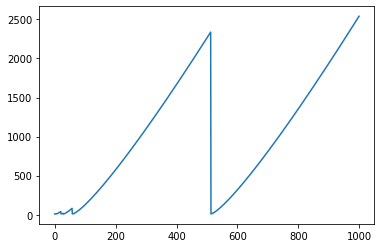

In [148]:
%%time
solution = simulated_annealing_for_graph(0, 10, 1000, [7, 9, 7, 9, 7, 9, 6, 7, 7, 9], [0,1,2,3,4,5,6,7,8,9], 0.2, 1000, 10, flow, cost)
print("solution", solution)
print("cost best solution", get_cost(solution, 0.2, flow, cost, [0,1,2,3,4,5,6,7,8,9]))